# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 1.3 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
pandas-stubs 2.1.4.231227 requires numpy>=1.26.0; python_version < "3.13", but you have numpy 1.25.2 which is incompatible.

In [ ]:
# To load and manipulate data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# Import evalutaion metrices for classification
from sklearn import metrics

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix )

%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import SMOTE package for oversampling
from imblearn.over_sampling import SMOTE

# Import Random undersampler for undersampling
from imblearn.under_sampling import RandomUnderSampler

# Import packages to test and and split
from sklearn.model_selection import train_test_split

# Import package for Randomizedsearchcv
from sklearn.model_selection import RandomizedSearchCV

# Import package GridSrearchCV
from sklearn.model_selection import GridSearchCV

# Import packages for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost
#!pip install xgboost
from xgboost import XGBClassifier

RS = 1

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

## Loading the dataset

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read .cvs file in dataframe
orig_df = pd.read_csv('/content/drive/MyDrive/python/Advanced Machine Learning/Projects/BankChurners.csv')

In [ ]:
# creating a copy of the data
bankchurn_df = orig_df.copy()

## Data Overview

### Viewing the first, last ans random 5 rows of the dataset

In [ ]:
# Print the head of data set
bankchurn_df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [ ]:
# Print the Tail of data set
bankchurn_df.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              60   
10125                 0.535             8395              62   
10126                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189  

[5 rows x 21 columns]

In [ ]:
# Print Random rows of data set
bankchurn_df.sample(5,random_state=1)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
6498  712389108  Existing Customer            43      F                2   
9013  718388733  Existing Customer            38      F                1   
2053  710109633  Existing Customer            39      M                2   
3211  717331758  Existing Customer            44      M                4   
5559  709460883  Attrited Customer            38      F                2   

     Education_Level Marital_Status Income_Category Card_Category  \
6498        Graduate        Married  Less than $40K          Blue   
9013         College            NaN  Less than $40K          Blue   
2053         College        Married     $60K - $80K          Blue   
3211        Graduate        Married         $120K +          Blue   
5559       Doctorate        Married  Less than $40K          Blue   

      Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
6498              36  ...                       3                      2   
9013              32  ...                       3                      3   
2053              31  ...                       3                      2   
3211              32  ...                       3                      4   
5559              28  ...                       2                      4   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
6498        2570.0                 2107            463.0   
9013        2609.0                 1259           1350.0   
2053        9871.0                 1061           8810.0   
3211       34516.0                 2517          31999.0   
5559        1614.0                    0           1614.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6498                 0.651             4058              83   
9013                 0.871             8677              96   
2053                 0.545             1683              34   
3211                 0.765             4228              83   
5559                 0.609             2437              46   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
6498                0.766                  0.820  
9013                0.627                  0.483  
2053                0.478                  0.107  
3211                0.596                  0.073  
5559                0.438                  0.000  

[5 rows x 21 columns]

- Observations
- Sanity checks

### Checking the shape of the dataset.

In [ ]:
# Print the rows and columns of data set
print("Number of Rows: ", bankchurn_df.shape[0])
print("Number of Columns: ", bankchurn_df.shape[1])

Number of Rows:  10127
Number of Columns:  21


- The dataset has 10127 rows and 21 columns.

### Checking the attribute types

In [ ]:
# Print the dataset info
bankchurn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- There are 15 numerical variables in the data with 6 object type variabls.


### Checking the statistical summary

In [ ]:
# Print the statistical summary including categorial variables
#bankchurn_df.describe().T
bankchurn_df.describe(include='all').T

count unique                top  freq  \
CLIENTNUM                 10127.0    NaN                NaN   NaN   
Attrition_Flag              10127      2  Existing Customer  8500   
Customer_Age              10127.0    NaN                NaN   NaN   
Gender                      10127      2                  F  5358   
Dependent_count           10127.0    NaN                NaN   NaN   
Education_Level              8608      6           Graduate  3128   
Marital_Status               9378      3            Married  4687   
Income_Category             10127      6     Less than $40K  3561   
Card_Category               10127      4               Blue  9436   
Months_on_book            10127.0    NaN                NaN   NaN   
Total_Relationship_Count  10127.0    NaN                NaN   NaN   
Months_Inactive_12_mon    10127.0    NaN                NaN   NaN   
Contacts_Count_12_mon     10127.0    NaN                NaN   NaN   
Credit_Limit              10127.0    NaN                NaN   NaN   
Total_Revolving_Bal       10127.0    NaN                NaN   NaN   
Avg_Open_To_Buy           10127.0    NaN                NaN   NaN   
Total_Amt_Chng_Q4_Q1      10127.0    NaN                NaN   NaN   
Total_Trans_Amt           10127.0    NaN                NaN   NaN   
Total_Trans_Ct            10127.0    NaN                NaN   NaN   
Total_Ct_Chng_Q4_Q1       10127.0    NaN                NaN   NaN   
Avg_Utilization_Ratio     10127.0    NaN                NaN   NaN   

                                      mean              std          min  \
CLIENTNUM                 739177606.333663  36903783.450231  708082083.0   
Attrition_Flag                         NaN              NaN          NaN   
Customer_Age                      46.32596         8.016814         26.0   
Gender                                 NaN              NaN          NaN   
Dependent_count                   2.346203         1.298908          0.0   
Education_Level                        NaN              NaN          NaN   
Marital_Status                         NaN              NaN          NaN   
Income_Category                        NaN              NaN          NaN   
Card_Category                          NaN              NaN          NaN   
Months_on_book                   35.928409         7.986416         13.0   
Total_Relationship_Count           3.81258         1.554408          1.0   
Months_Inactive_12_mon            2.341167         1.010622          0.0   
Contacts_Count_12_mon             2.455317         1.106225          0.0   
Credit_Limit                   8631.953698       9088.77665       1438.3   
Total_Revolving_Bal            1162.814061       814.987335          0.0   
Avg_Open_To_Buy                7469.139637      9090.685324          3.0   
Total_Amt_Chng_Q4_Q1              0.759941         0.219207          0.0   
Total_Trans_Amt                4404.086304      3397.129254        510.0   
Total_Trans_Ct                   64.858695         23.47257         10.0   
Total_Ct_Chng_Q4_Q1               0.712222         0.238086          0.0   
Avg_Utilization_Ratio             0.274894         0.275691          0.0   

                                  25%          50%          75%          max  
CLIENTNUM                 713036770.5  717926358.0  773143533.0  828343083.0  
Attrition_Flag                    NaN          NaN          NaN          NaN  
Customer_Age                     41.0         46.0         52.0         73.0  
Gender                            NaN          NaN          NaN          NaN  
Dependent_count                   1.0          2.0          3.0          5.0  
Education_Level                   NaN          NaN          NaN          NaN  
Marital_Status                    NaN          NaN          NaN          NaN  
Income_Category                   NaN          NaN          NaN          NaN  
Card_Category                     NaN          NaN          NaN          NaN  
Months_on_book                   31.0         

**Observations**
- The CLIENTNUM column has no significance.
- Out of 10,127 customers, 8,500 are existing customers.
- The average age of customers is approximately 46 years.
- On average, customers have around 2.34 dependents.
- Education Level and Marital Status have missing values.
- 3,561 customers belong to the less than $40K income category.
- 9,436 out of 10,127 customers have a Blue card.
- On average, customers have a 35-month relationship with the bank.
- On average, customers use around 3 products from the bank, with a maximum of 6 products.
- On average, customers are inactive for approximately 2.34 months, with some being inactive for up to 6 months.
- On average, customers contacted the bank approximately 2.45 times in the last 12 months, with some contacting up to 6 times.
- Credit Limit:
  - The average credit limit is approximately 8,631.95 dollars.
  - 50% of customers have a credit limit of 4,590 dollars.
  - The maximum credit limit for some customers reaches up to 34,516 dollars.
- On average, customers have a total revolving balance of approximately 1,162 dollars.
- The average open-to-buy credit line is around 7,649, with some customers having up to 34,516 dollars.
- On average, customers’ total transaction amount in the last 12 months is approximately 4,404 dollars.
- On average, customers’ total transaction count is around 64.85.
- On average, customers spend approximately 27% of their available credit.

### Checking for missing values

In [ ]:
# Check if data set has any missing values
bankchurn_df.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

- Following columns has missing values in the dataset.
 - Education_Level
 - Marital_Status

### Checking for duplicate values

In [ ]:
# Check if dataset has duplicate rows
bankchurn_df.duplicated().sum()

0

- There are no duplicates rows in the dataset.

###Dropping the CLIENTNUM Column

In [ ]:
# Drop the ID column from the data set as it is not required in further EDA and Data Modeling
bankchurn_df.drop('CLIENTNUM', axis=1, inplace=True)

- CLIENTNUM column has no significance, so dropping it

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### **Let's look at spread of the Age of the Customers**

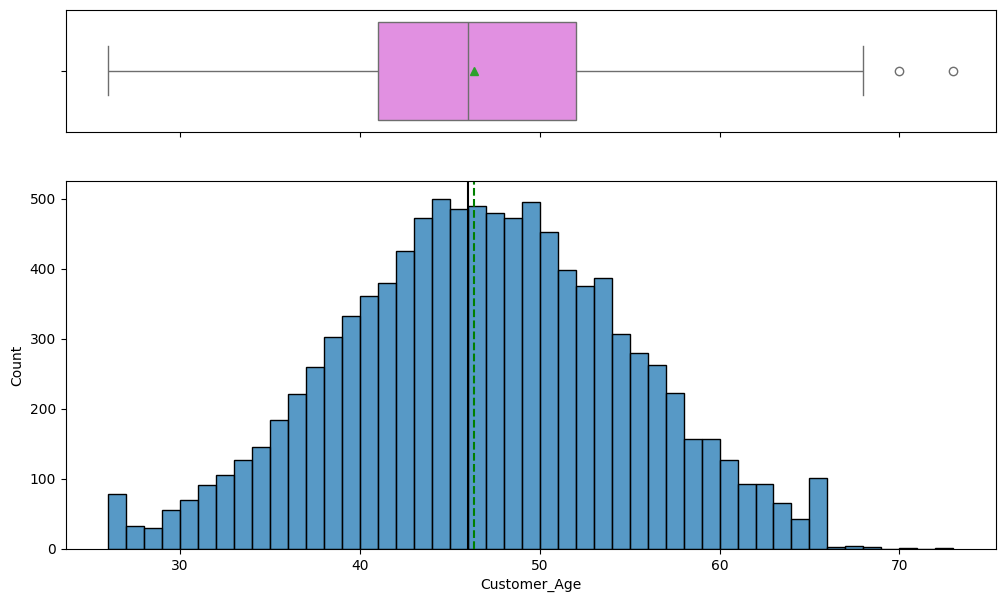

In [ ]:
# Create the Histogram and boxplot for Age of customers
histogram_boxplot(bankchurn_df, 'Customer_Age')

**Observations**

- The age distribution of customers appears to be uniform.
- Most customers’ ages are concentrated within the range of 41 to 52 years.
- The median age is approximately 46 years.

#### **Let's look at Gender counts of customers**

Gender Count = Gender
F    5358
M    4769
Name: count, dtype: int64


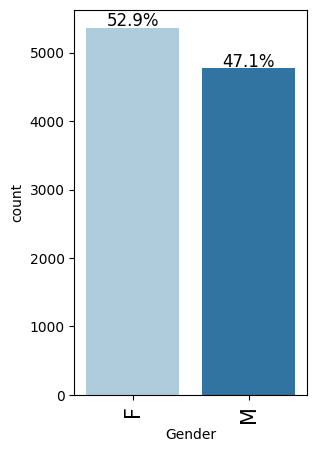

In [ ]:
# Check count per Gender type in Gender column
print(f"Gender Count = {bankchurn_df['Gender'].value_counts()}");

# Percentage of Genders among customers
labeled_barplot(bankchurn_df, 'Gender', perc=True)

**Observations**

- The total number of female customers is 5,358, which constitutes approximately 52.9% of the customer base.

- The total number of male customers is 4,769, which constitutes approximately 47.1% of the customer base.

#### **Let's look at Dependent of customers counts**

Total number of dependent type = 6 with distinct dependent sizes [3 5 4 2 0 1]


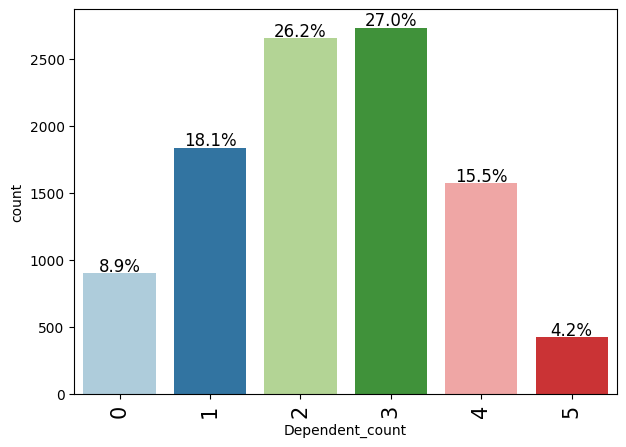

In [ ]:
# Check all unique dependents exists in Dependent_count column
print(f"Total number of dependent type = {bankchurn_df['Dependent_count'].nunique()} with distinct dependent sizes {bankchurn_df['Dependent_count'].unique()}")

# Percentage of total dependents per dependent type
labeled_barplot(bankchurn_df, 'Dependent_count', perc=True)

**Observations**

- There are **6 distinct types** of dependents, ranging from 0 to 6 dependents.
- The highest number of customers have **3 dependents**, followed by those with 2 and 1 dependents.
- **8.9%** of customers are single and have no dependents.


#### **Let's look at Education Level of the Customers**

Total number of Education Levels = 6 with distinct Education Levels ['High School' 'Graduate' 'Uneducated' nan 'College' 'Post-Graduate'
 'Doctorate']


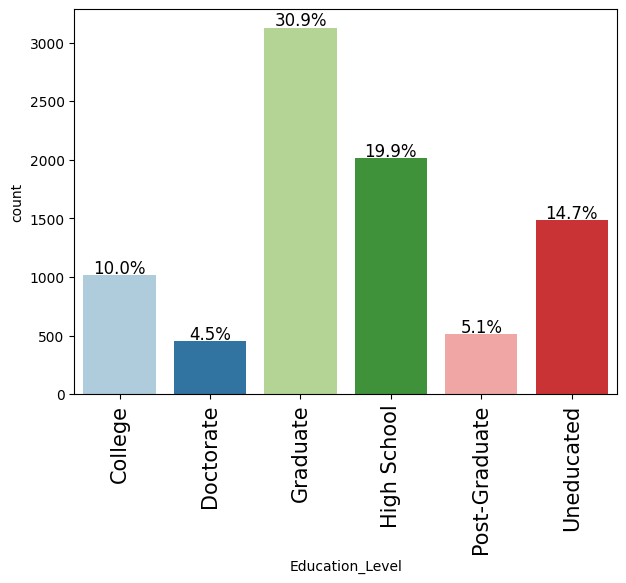

In [ ]:
# Check all unique Education Levels exists in Education column
print(f"Total number of Education Levels = {bankchurn_df['Education_Level'].nunique()} with distinct Education Levels {bankchurn_df['Education_Level'].unique()}")

# Percentage of total Education per Education Levels
labeled_barplot(bankchurn_df, 'Education_Level', perc=True)

**Observations**

- **30.9%** of customers are graduates, while **5.1%** have postgraduate degrees.
- **10.1%** of customers attended college, and **19.9%** completed high school.
- Only **4.5%** of customers hold a doctorate degree.
- **14.7%** of customers are uneducated.
- There are **1519** customers with missing values in the Education column, which need to be addressed.

#### **Let's look at Marital Status counts of customers**

Total number of Marital Status = 3 with distinct Marital Status ['Married' 'Single' nan 'Divorced']


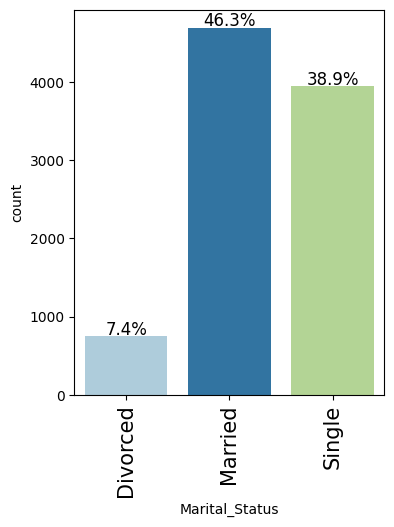

In [ ]:
# Check all unique Marital Status exists in Marital Status column
print(f"Total number of Marital Status = {bankchurn_df['Marital_Status'].nunique()} with distinct Marital Status {bankchurn_df['Marital_Status'].unique()}")


# Percentage of Marital Status among Marital Status Types
labeled_barplot(bankchurn_df, 'Marital_Status', perc=True)

**Observations**

* **46.3%** customers are Married, while 38.9% are single.
* **7.4%** customers are divorced.
* There are 749 customers with missing values in the Marital Status column, which need to be addressed.

#### **Let's look at Income Category counts of customers**

Total number of Income Category = 6 with distinct Income Categories ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'abc']


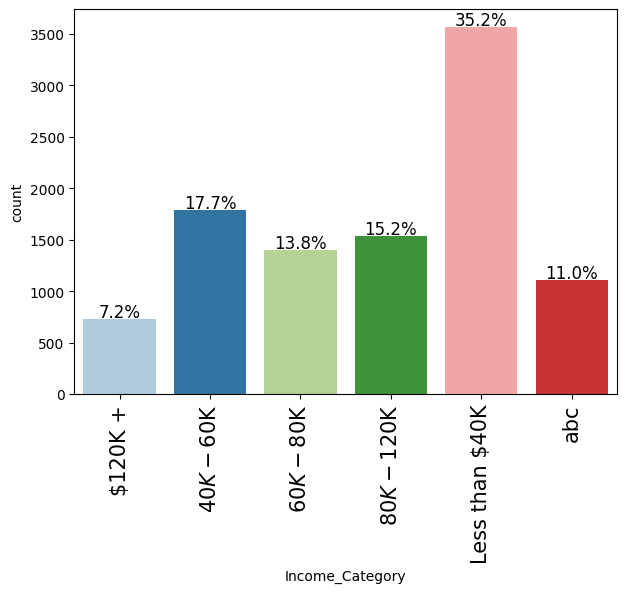

In [ ]:
# Check all Annual Income Category of the account holder
print(f"Total number of Income Category = {bankchurn_df['Income_Category'].nunique()} with distinct Income Categories {bankchurn_df['Income_Category'].unique()}")


# Percentage of Annual Income Category of the account holder per Income Category
labeled_barplot(bankchurn_df, 'Income_Category', perc=True)

**Observations**

* **35.2%** customers earn less than 40K a year.
* **17.7%** customers earn between 40K and 60k a year.
* **13.8%** customers earn between 60K and 80k a year.
* **15.2%** customers earn between 80K and 120k a year.
* **7.2%** customers earn more than 12040K a year.
* **11%** customer have an unknown income category.

#### **Let's look at Card Category counts of customers**

Total number of Card Category = 4 with distinct Card Categories ['Blue' 'Gold' 'Silver' 'Platinum']


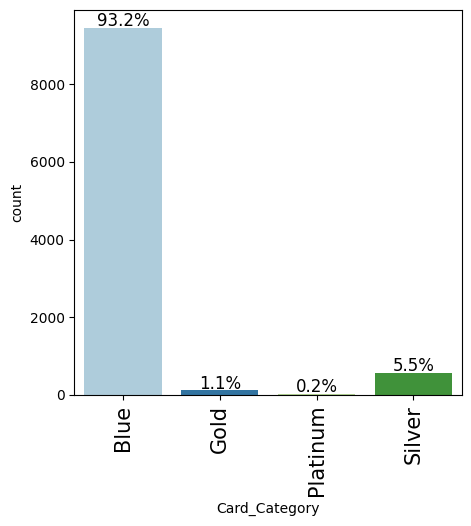

In [ ]:
# Check all Annual Income Category of the account holder
print(f"Total number of Card Category = {bankchurn_df['Card_Category'].nunique()} with distinct Card Categories {bankchurn_df['Card_Category'].unique()}")


# Percentage of Card_Category of the account holder per Card Category
labeled_barplot(bankchurn_df, 'Card_Category', perc=True)

**Observations**

* **93.2%** customers have a Blue Card.
* **5.5%** customers have a silver card.
* Only **1.1%** customers have a Gold Card.
* Only **0.2%** customers have a Platinum Card.


#### **Let's look at spread of the Period of Months with the bank of the Customers**

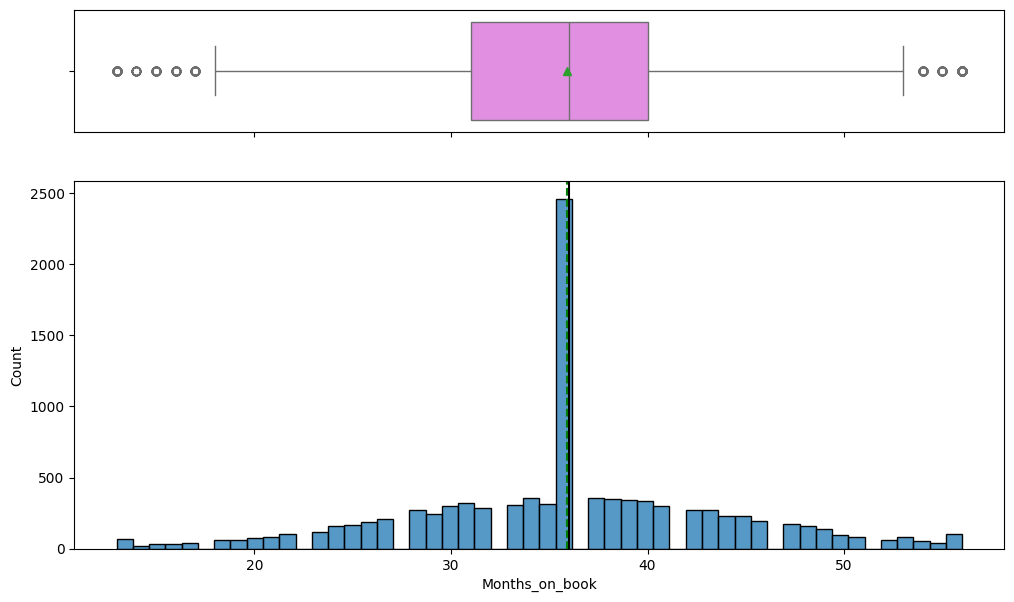

In [ ]:
# Create the Histogram and boxplot for Months_on_book of customers
histogram_boxplot(bankchurn_df, 'Months_on_book')

**Observations**

- The period of months in the relationship with the bank appears to have a uniform distribution among customers.
- Most customer data is concentrated within the range of 37 to 40 months.
- The Months_on_book variable has some outliers on both ends of the distribution.

#### **Let's look at Total number of products held by the customer**

Total number of products = 6 with distinct number of products [5 6 4 3 2 1]


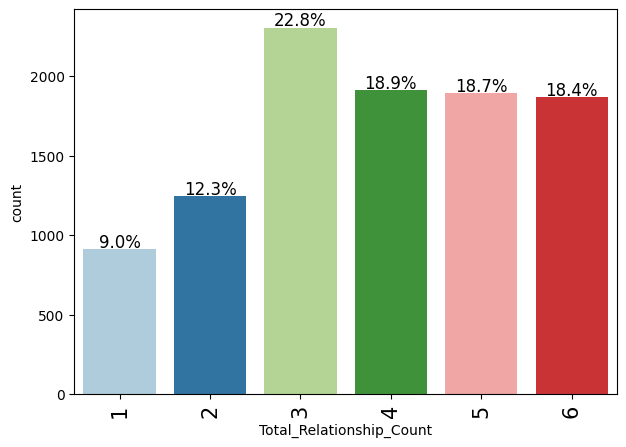

In [ ]:
# Check all number of products of the account holder
print(f"Total number of products = {bankchurn_df['Total_Relationship_Count'].nunique()} with distinct number of products {bankchurn_df['Total_Relationship_Count'].unique()}")


# Percentage of products of the account holder held per number of products
labeled_barplot(bankchurn_df, 'Total_Relationship_Count', perc=True)

**Observations**

- The highest number of customers have **3 products**, followed by those with **4, 5, and 6 products**.
- **12.3%** of customers use **2 products**.
- Only **9%** of customers have **1 product**.


#### **Let's look at the number of months customers are inactive in the last 12 months**

Total number of Inactive months = 7 with distinct Inactive months [1 4 2 3 6 0 5]


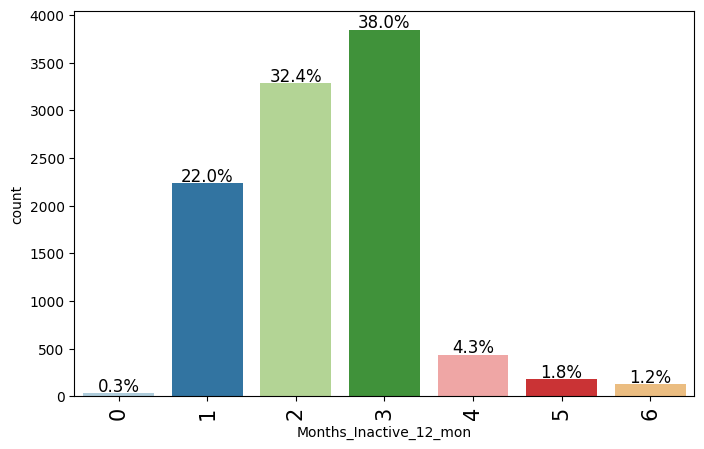

In [ ]:
# Check all Inactive months of number of months customers are inactive
print(f"Total number of Inactive months = {bankchurn_df['Months_Inactive_12_mon'].nunique()} with distinct Inactive months {bankchurn_df['Months_Inactive_12_mon'].unique()}")


# Percentage of customers Inactive per Inactive months
labeled_barplot(bankchurn_df, 'Months_Inactive_12_mon', perc=True)

**Observations**

- 3 months is the highest number of inactive months for 38.0% of customers, followed by 2 months and 1 month.
- 4.3% of customers are inactive for 4 months.
- Only 1.8% of customers are inactive for 5 months, followed by 1.2% for 6 months.
- Only 0.3% of customers are not inactive at all.

#### **Let's look at the number of contacts between the customer and bank in the last 12 months**

Total number of Inactive months = 7 with distinct Inactive months [3 2 0 1 4 5 6]


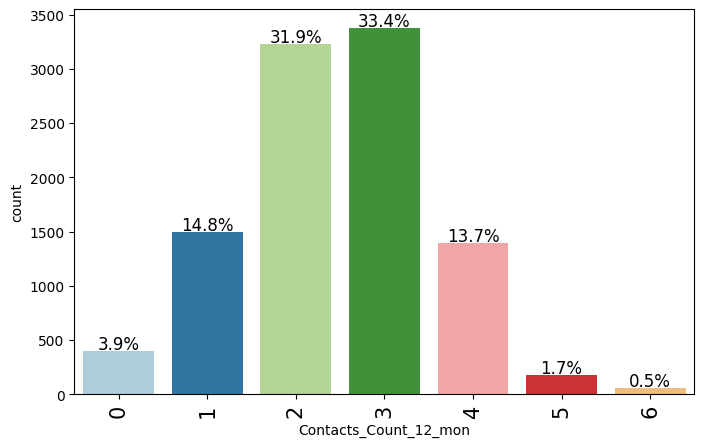

In [ ]:
# Check all unique number of months where customers contacted bank
print(f"Total number of Inactive months = {bankchurn_df['Contacts_Count_12_mon'].nunique()} with distinct Inactive months {bankchurn_df['Contacts_Count_12_mon'].unique()}")


# Percentage of customers contacted bank per months
labeled_barplot(bankchurn_df, 'Contacts_Count_12_mon', perc=True)

**Observations**

- 3 months is the highest number of contacted months for 33.4% of customers, followed by 2, 1, and 4 months.
- 4.3% of customers contacted the bank in 4 months.
- Only 1.7% of customers contacted the bank in 5 months, followed by 0.5% in 6 months.
- 3.9% of customers did not contact the bank at all in the past 12 months.


#### **Let's look at spread of the Credit Limit of card of the Customers**

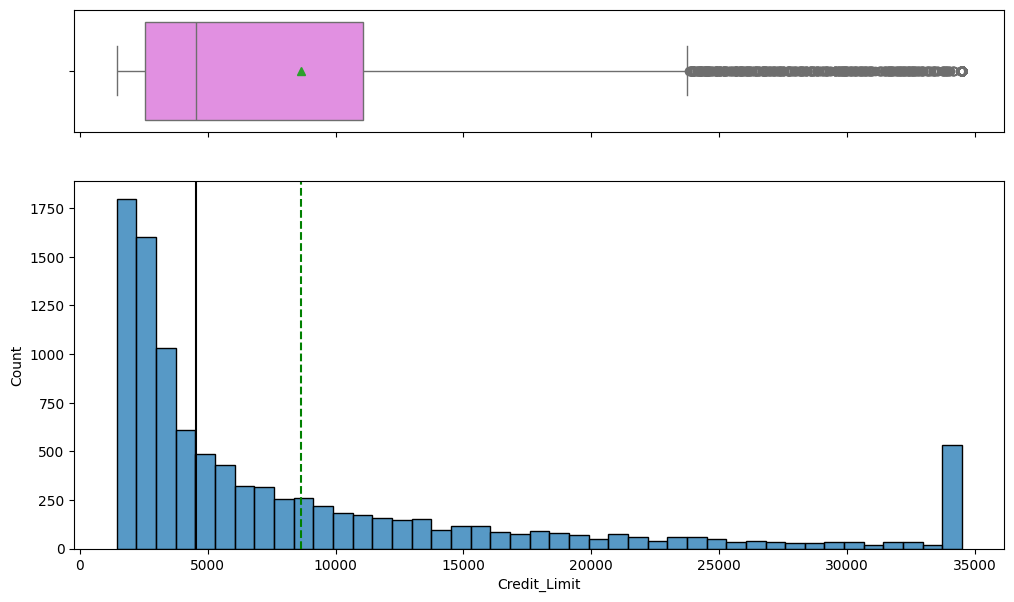

In [ ]:
# Create the Histogram and boxplot for Credit_Limit of customers
histogram_boxplot(bankchurn_df, 'Credit_Limit')

**Observations**

- The distribution of credit limits among customers is highly right-skewed.
- The mean credit limit is approximately 8K dollars.
- The median credit limit is approximately 4K dollars.
- Most customers’ credit limits are concentrated within the range of 1.5K to $12K.
- The credit limit column has many upper outliers.

#### **Let's look at spread of the Revolving Balance of the Customers**

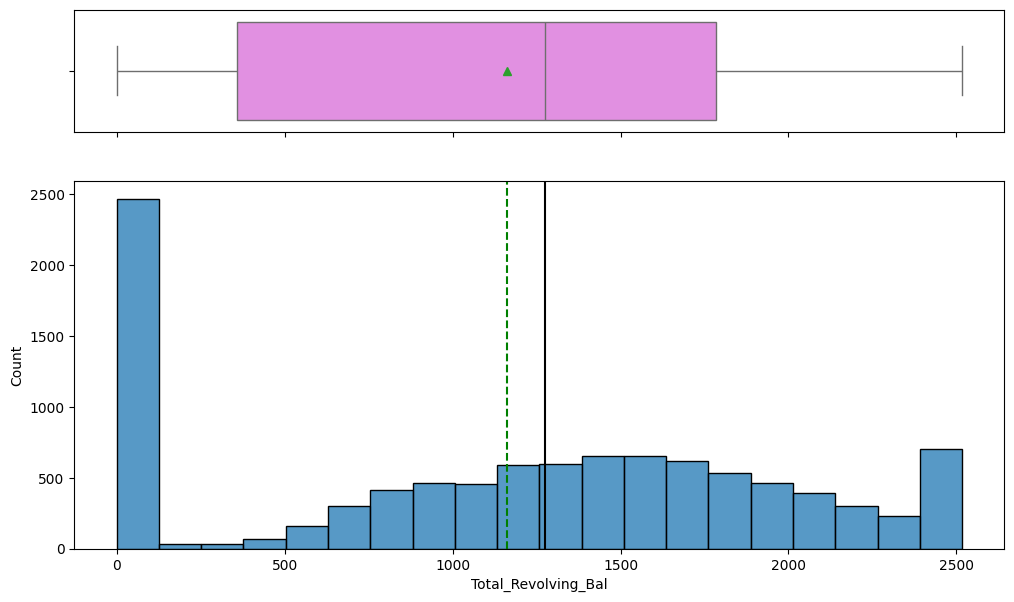

In [ ]:
# Create the Histogram and boxplot for Total_Revolving_Bal of customers
histogram_boxplot(bankchurn_df, 'Total_Revolving_Bal')

**Observations**

- The distribution of revolving balances among customers is slightly left-skewed.
- The mean revolving balance is approximately 1,125 dollars.
- The median revolving balance is approximately 1,250 dollars.
- Most customers’ revolving balances are concentrated within the range of 390 to $1,750.

#### **Let's look at spread of the Open to Buy amount of the Customers**

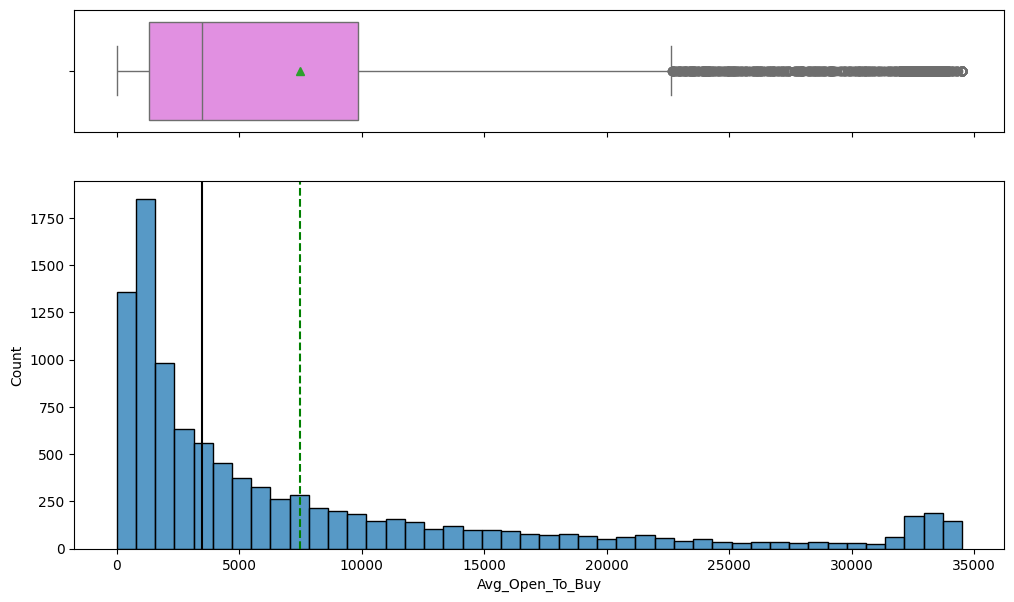

In [ ]:
# Create the Histogram and boxplot for Avg_Open_To_Buy of customers
histogram_boxplot(bankchurn_df, 'Avg_Open_To_Buy')

**Observations**

- The Avg_Open_To_Buy column has a highly right-skewed distribution among customers.
- The mean value for Avg_Open_To_Buy is approximately 7.5K dollars.
- The median value for Avg_Open_To_Buy is approximately 3.5K dollars.
- Most customers’ Avg_Open_To_Buy values are concentrated within the range of 3K to $10K.
- The Avg_Open_To_Buy column has many upper outliers.

#### **Let's look at spread of the Total Transaction Amount of the Customers**

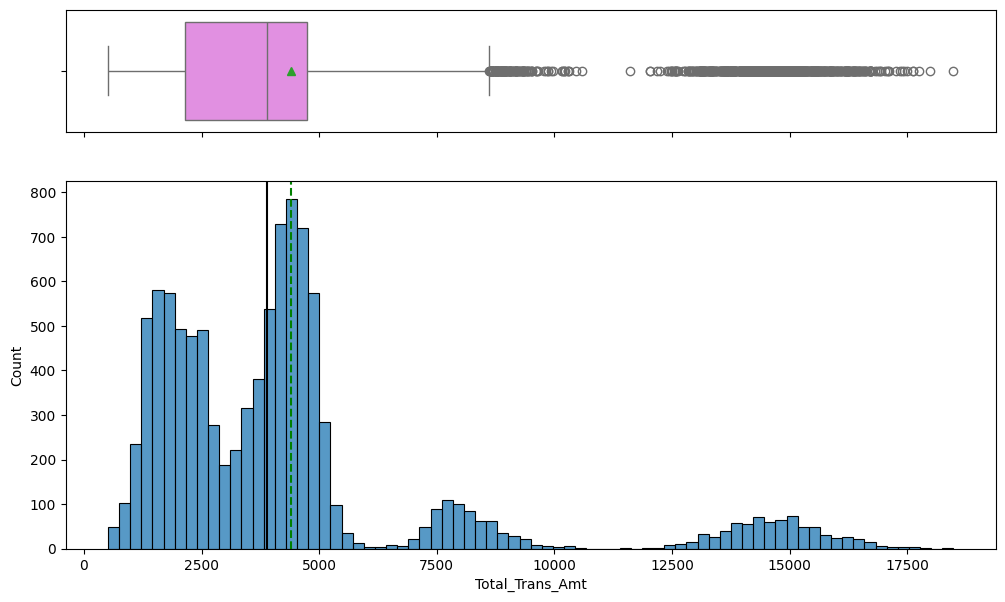

In [ ]:
# Create the Histogram and boxplot for Total_Trans_Amt of customers
histogram_boxplot(bankchurn_df, 'Total_Trans_Amt')

**Observations**

- The Total_Trans_Amt column has a right-skewed distribution among customers.
- The mean value for Total_Trans_Amt is approximately 4.2K dollars.
- The median value for Total_Trans_Amt is approximately 3.7K dollars.
- Most customers’ Total_Trans_Amt values are concentrated within the range of 2.2K to 4.7K dollars.
- The Total_Trans_Amt column has many upper outliers.

#### **Let's look at spread of the Total Transaction Count of the Customers**

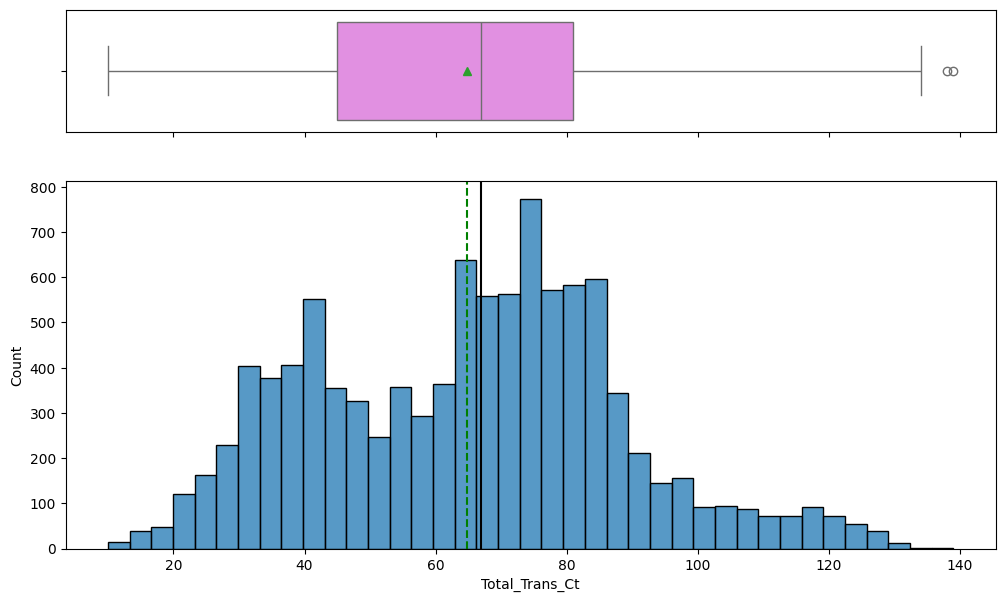

In [ ]:
# Create the Histogram and boxplot for Total_Trans_Ct of customers
histogram_boxplot(bankchurn_df, 'Total_Trans_Ct')

**Observations**

- The Total_Trans_Ct (Total Transaction Count) appears to have a uniform distribution among customers.
- Most customers’ Total_Trans_Ct values are concentrated within the range of 42 to 81 transactions.
- The median Total_Trans_Ct is approximately 63 transactions.


#### **Let's look at spread of Ratio of the total transaction count in 4th quarter and in 1st quarter of the Customers**

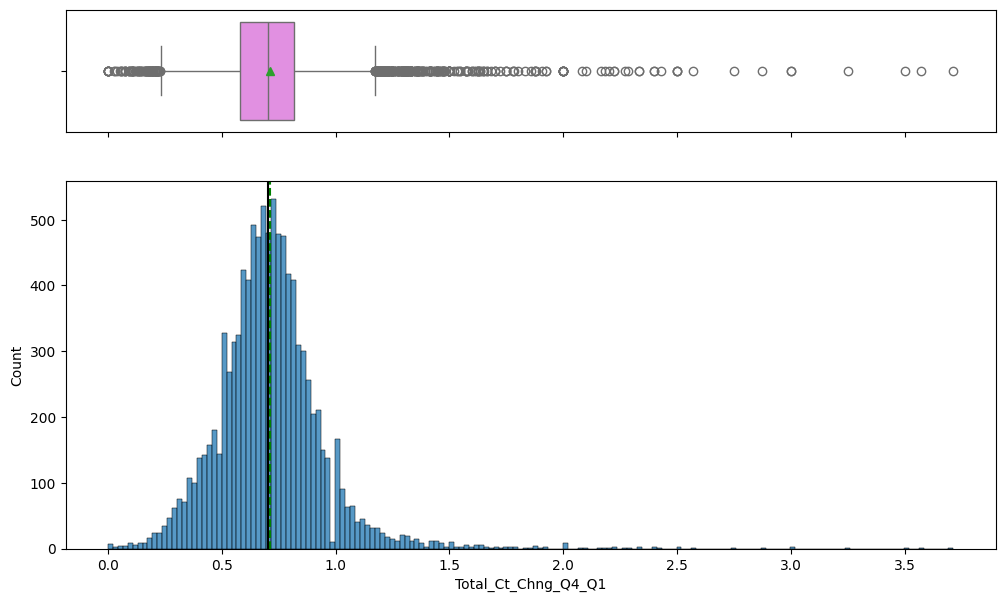

In [ ]:
# Create the Histogram and boxplot for Total_Ct_Chng_Q4_Q1 of customers
histogram_boxplot(bankchurn_df, 'Total_Ct_Chng_Q4_Q1')

**Observations**

- The Total_Ct_Chng_Q4_Q1 (Change in Transaction Count from Q4 to Q1) appears to have a uniform distribution among customers.
- Most of the Total_Ct_Chng_Q4_Q1 values are concentrated within the range of 0.55 to 0.7.
- The median Total_Ct_Chng_Q4_Q1 is approximately 0.65.
- The Total_Ct_Chng_Q4_Q1 column has many outliers.

#### **Let's look at spread of Ratio of the total transaction amount in 4th quarter and in 1st quarter of the Customers**

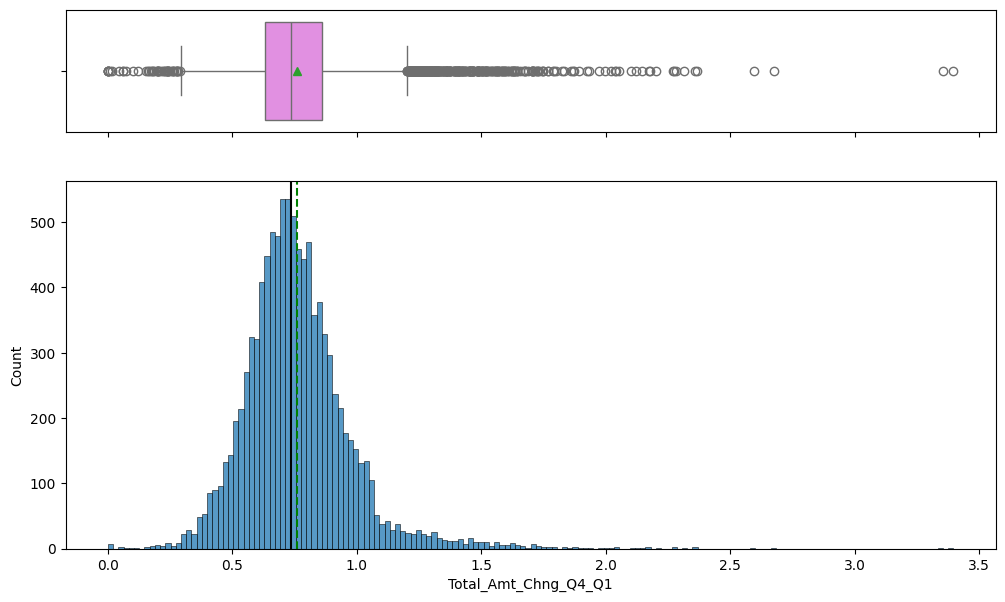

In [ ]:
# Create the Histogram and boxplot for Total_Amt_Chng_Q4_Q1 of customers
histogram_boxplot(bankchurn_df, 'Total_Amt_Chng_Q4_Q1')

**Observations**

- The Total_Amt_Chng_Q4_Q1 (Change in Transaction Amount from Q4 to Q1) appears to have a uniform distribution among customers.
- Most of the Total_Amt_Chng_Q4_Q1 values are concentrated within the range of 0.62 to 0.87.
- The median Total_Amt_Chng_Q4_Q1 is approximately 0.75.
- The Total_Amt_Chng_Q4_Q1 column has many outliers.

#### **Let's look at spread of Ratio of how much of the available credit the customer spent**

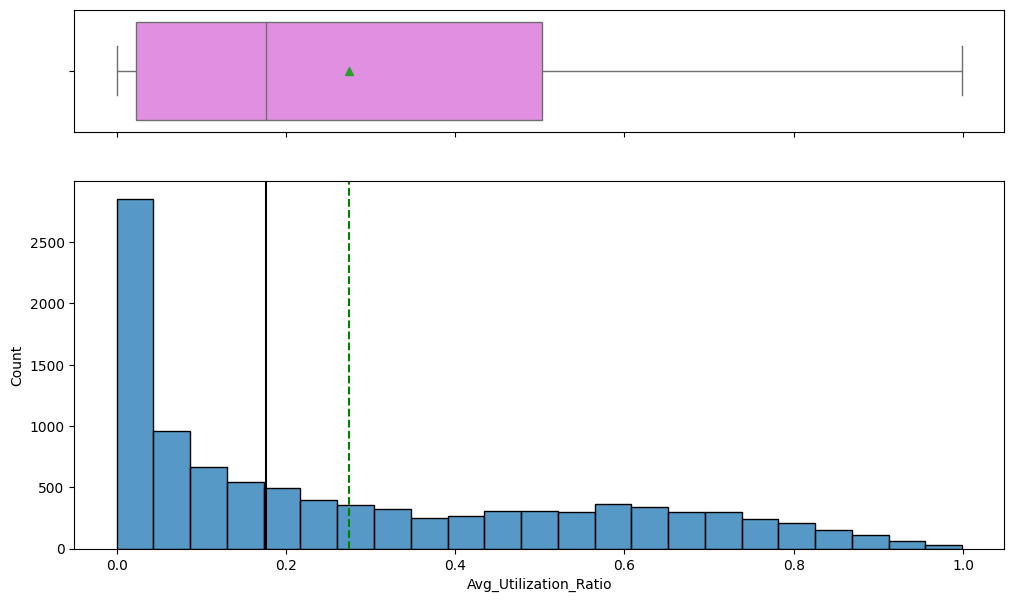

In [ ]:
# Create the Histogram and boxplot for Avg_Utilization_Ratio of customers
histogram_boxplot(bankchurn_df, 'Avg_Utilization_Ratio')

**Observations**

- The Avg_Utilization_Ratio column has a right-skewed distribution among customers.
- The mean value for Avg_Utilization_Ratio is approximately 0.27.
- The median value for Avg_Utilization_Ratio is approximately 0.19.
- Most customers’ Avg_Utilization_Ratio values are concentrated within the range of 0.01 to 0.5.

### Multivariate Analysis

#### **Let's look at the relationship between Attrition Flag Loan and Customer Age**

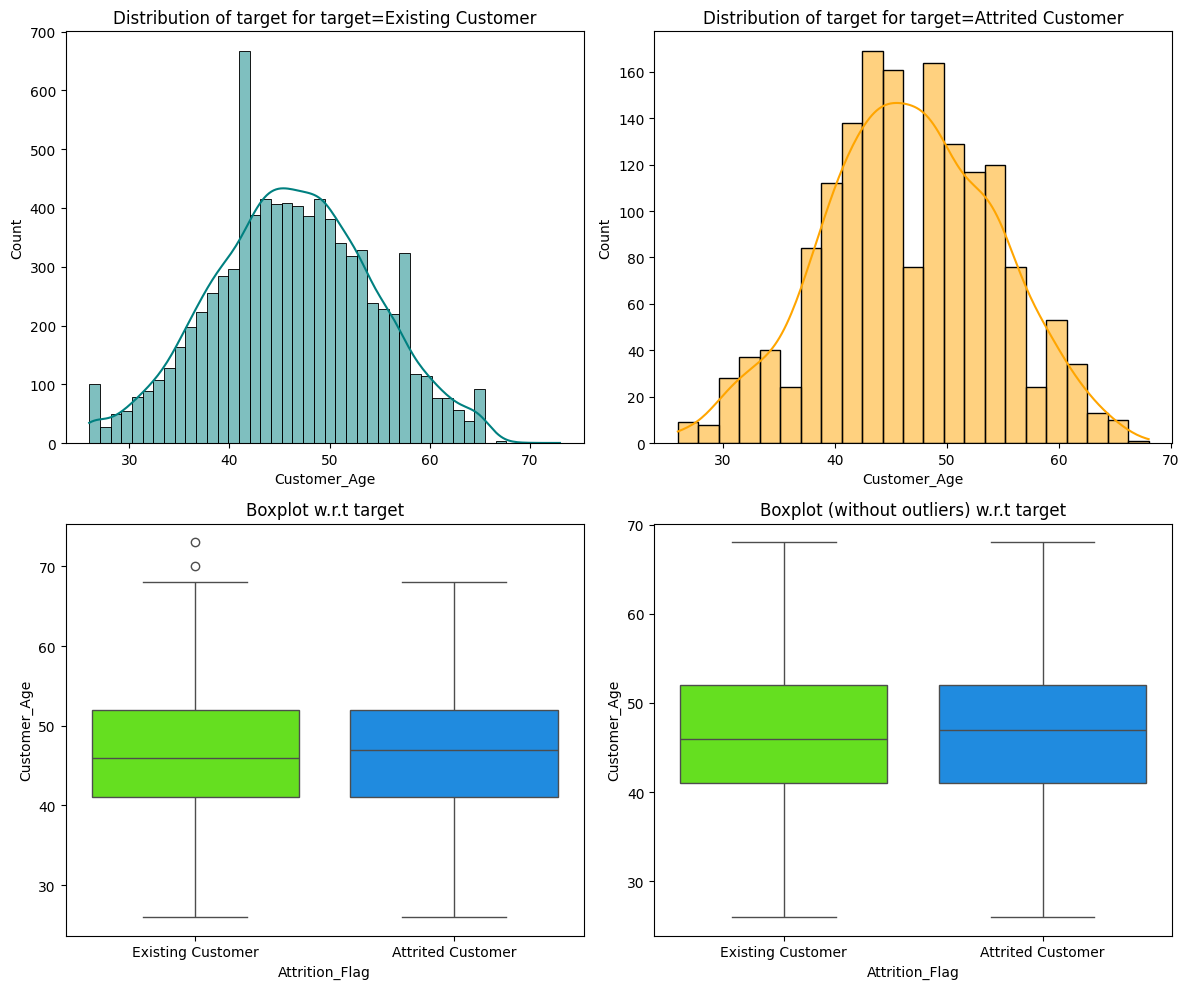

In [ ]:
# Relationship between Attrition Flag and Age
distribution_plot_wrt_target(bankchurn_df,'Customer_Age','Attrition_Flag')

- The age distribution of customers follows a normal pattern for both existing and attrited customers. Additionally, age does not appear to significantly influence whether a customer becomes attrited.

#### **Let's look at the relationship between Attrition Flag Loan and Customer Gender**

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


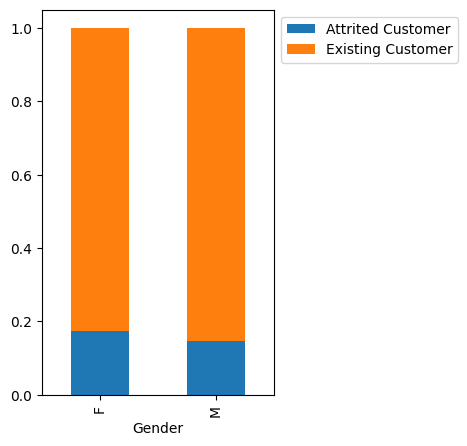

In [ ]:
# Relationship between Attrition Flag and Gender
stacked_barplot(bankchurn_df,'Gender','Attrition_Flag')

- Gender of customers has no impact on whether they become attrited.

#### **Let's look at the relationship between Attrition Flag Loan and Dependent Count**

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


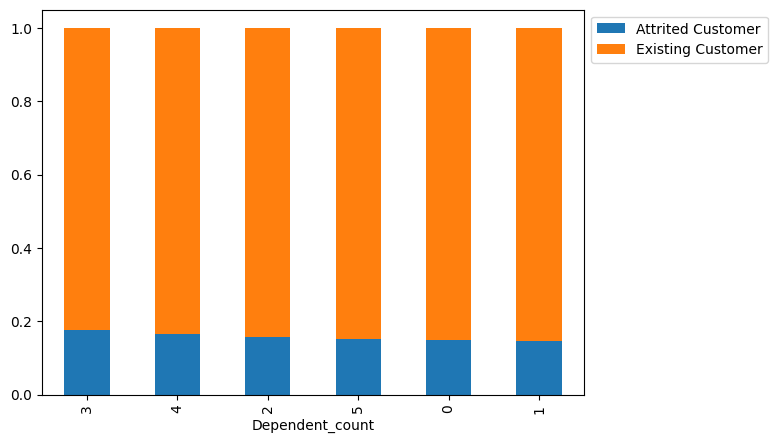

In [ ]:
# Relationship between Attrition Flag and Dependent Cound
stacked_barplot(bankchurn_df,'Dependent_count','Attrition_Flag')

- The count of dependents appears to be evenly distributed among the number of customers.
-The number of dependents does not seem to have a significant impact on customer attrition.

#### **Let's look at the relationship between Attrition Flag Loan and Education Level**

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


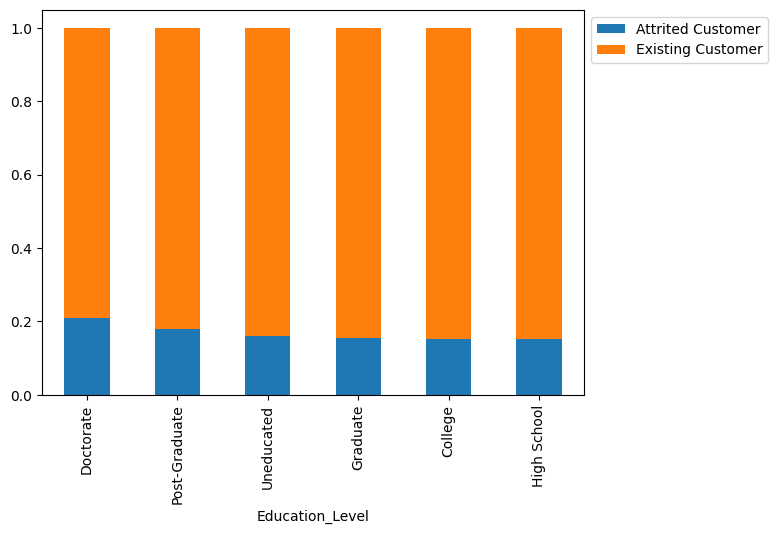

In [ ]:
# Relationship between Attrition Flag and Education Level
stacked_barplot(bankchurn_df,'Education_Level','Attrition_Flag')

- Higher the education more the chances of customers to be Attrited customers

#### **Let's look at the relationship between Attrition Flag Loan and Marital Status**

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


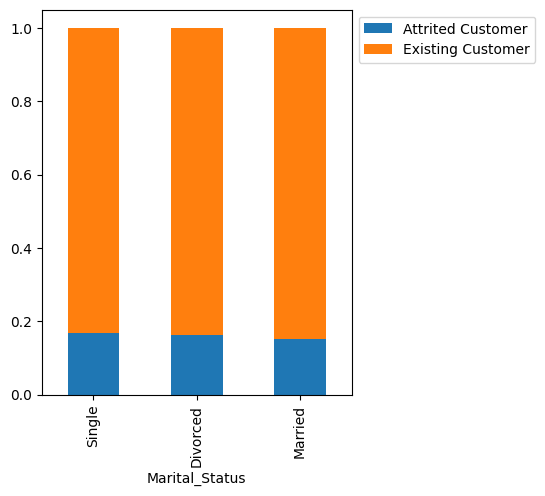

In [ ]:
# Relationship between Attrition Flag and Marital Status
stacked_barplot(bankchurn_df,'Marital_Status','Attrition_Flag')

- Marital Status of Customers has no such impact on Attrited Customers.

#### **Let's look at the relationship between Attrition Flag Loan and Income Category**

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


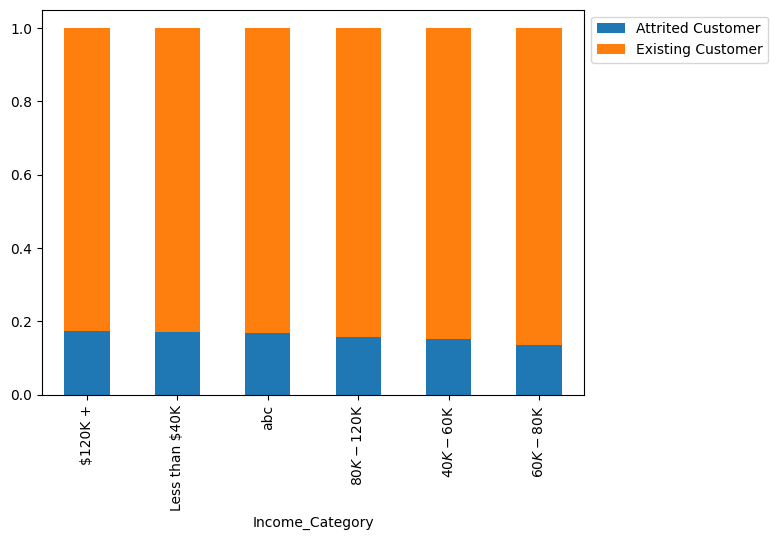

In [ ]:
# Relationship between Attrition Flag and Income Category
stacked_barplot(bankchurn_df,'Income_Category','Attrition_Flag')

- The income categories appear to be evenly distributed among the number of customers.
- The income category does not seem to have a significant impact on customer attrition.

#### **Let's look at the relationship between Attrition Flag Loan and Card Category**

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


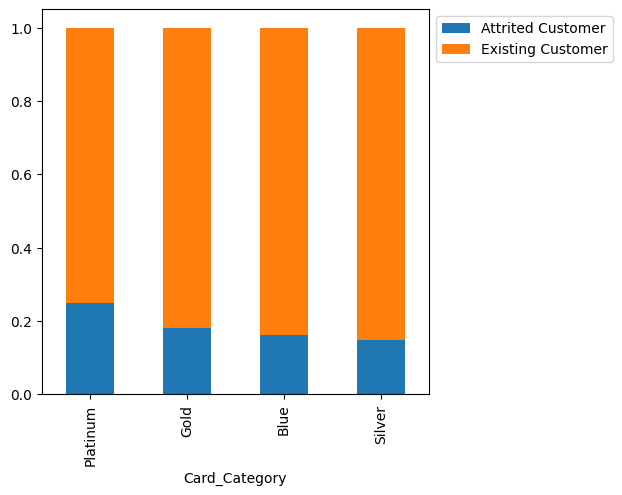

In [ ]:
# Relationship between Attrition Flag and Card Category
stacked_barplot(bankchurn_df,'Card_Category','Attrition_Flag')

- Higher the Card Category more the chances of customers to be Attrited customers

#### **Let's look at the relationship between Attrition Flag Loan and Months on book**

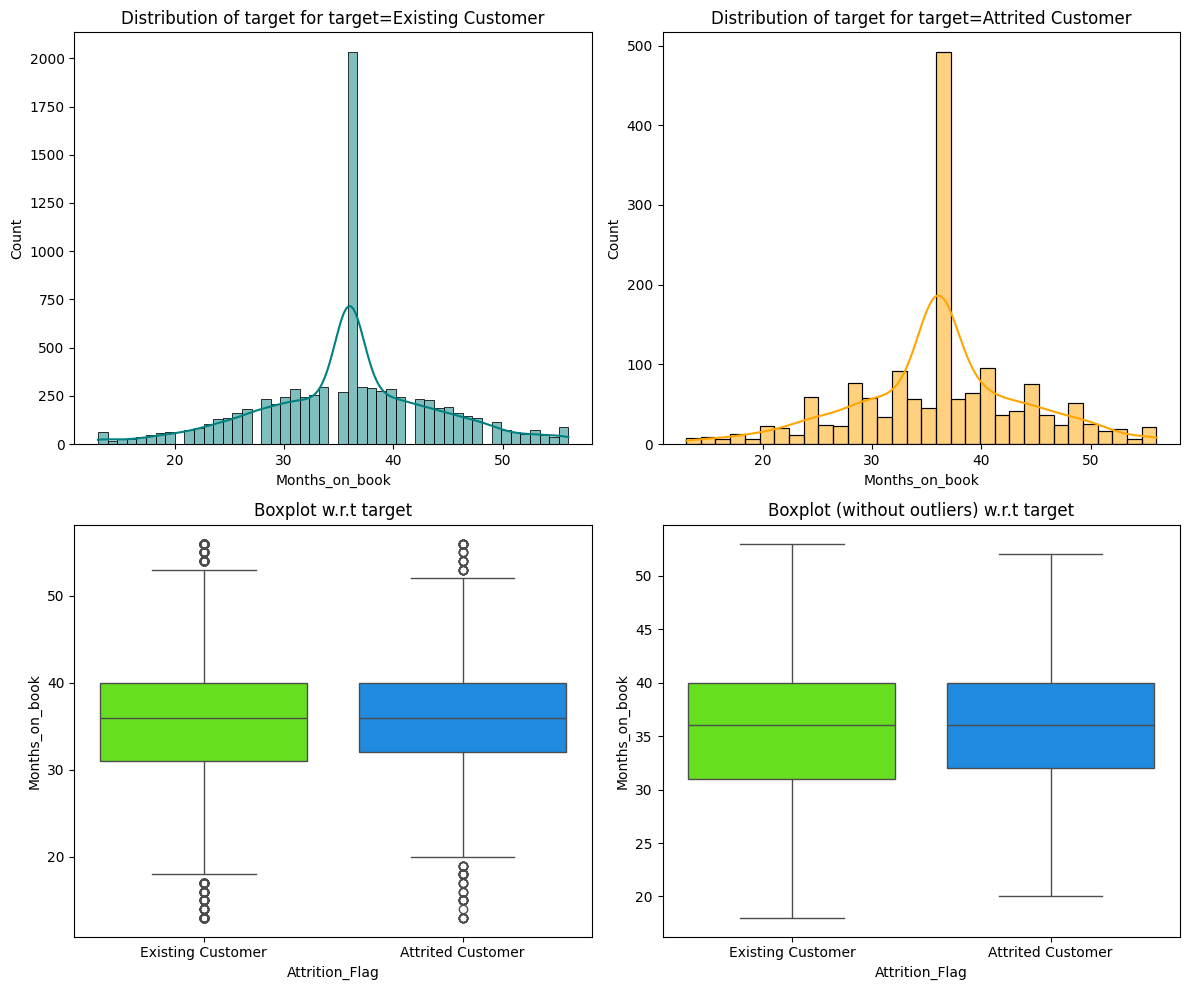

In [ ]:
# Relationship between Attrition Flag and Months on book
distribution_plot_wrt_target(bankchurn_df,'Months_on_book','Attrition_Flag')

- As per data distribution of Months on bool, it has normal distribution for for Existing and Attrited customers and does not have any influence over Attrited customers

#### **Let's look at the relationship between Attrition Flag Loan and Total Relationship Count**

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


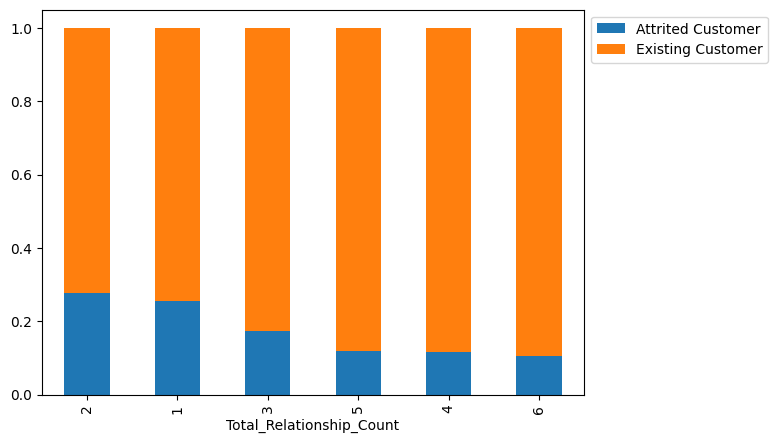

In [ ]:
# Relationship between Attrition Flag and Total Relationship Count
stacked_barplot(bankchurn_df,'Total_Relationship_Count','Attrition_Flag')

- Customers who has 2 products has more chances to be Attrited followed by 1 product and 3.
- Customer who are using more prodcuts less likely to be Attrited

#### **Let's look at the relationship between Attrition Flag Loan and No. of months inactive in the last 12 months**

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


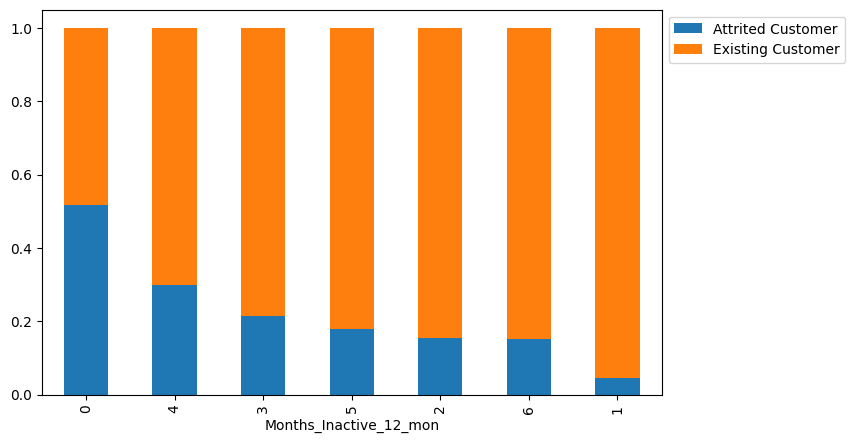

In [ ]:
# Relationship between Attrition Flag and Months Inactive 12 month
stacked_barplot(bankchurn_df,'Months_Inactive_12_mon','Attrition_Flag')

- Customers who are fully active have the highest likelihood of attrition, followed by those active for 4 months.
- Customers who are inactive for 1 month are less likely to be attrited.

#### **Let's look at the relationship between Attrition Flag and Number of Contacts between the customer and bank in the last 12 months**

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


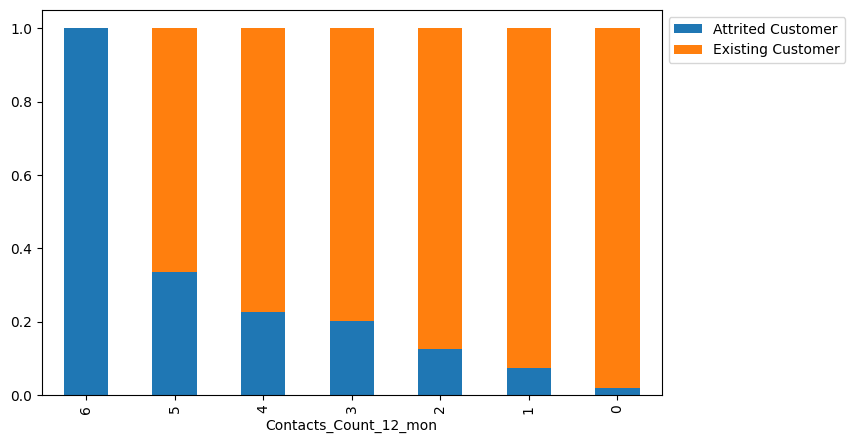

In [ ]:
# Relationship between Attrition Flag and Contacts Count 12 month
stacked_barplot(bankchurn_df,'Contacts_Count_12_mon','Attrition_Flag')

- Customers who contacted the bank 6 times are most likely to be attrited, followed by those who contacted the bank 5 and 4 times.
- Customers who did not contact the bank at all are less likely to be attrited, followed by those who contacted the bank for 1 or 2 months.

#### **Let's look at the relationship between Attrition Flag Loan and Customers Credit Limit on the Credit Card**

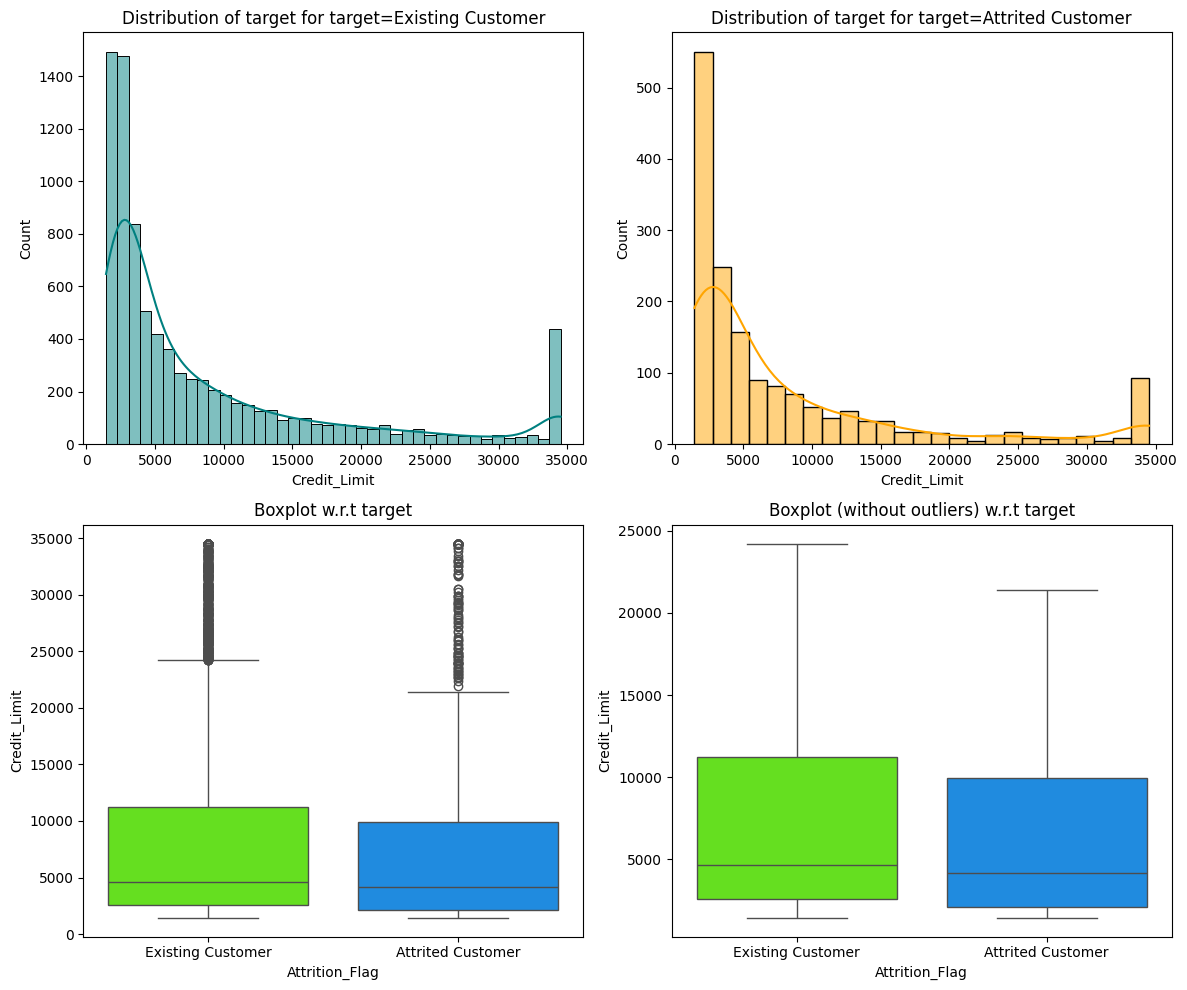

In [ ]:
# Relationship between Attrition Flag and Customers Credit_Limit
distribution_plot_wrt_target(bankchurn_df,'Credit_Limit','Attrition_Flag')

- The credit limit distribution is highly right-skewed with many outliers, but it does not show any relationship with whether customers will stop using bank services.

#### **Let's look at the relationship between Attrition Flag Loan and Revolving balance**

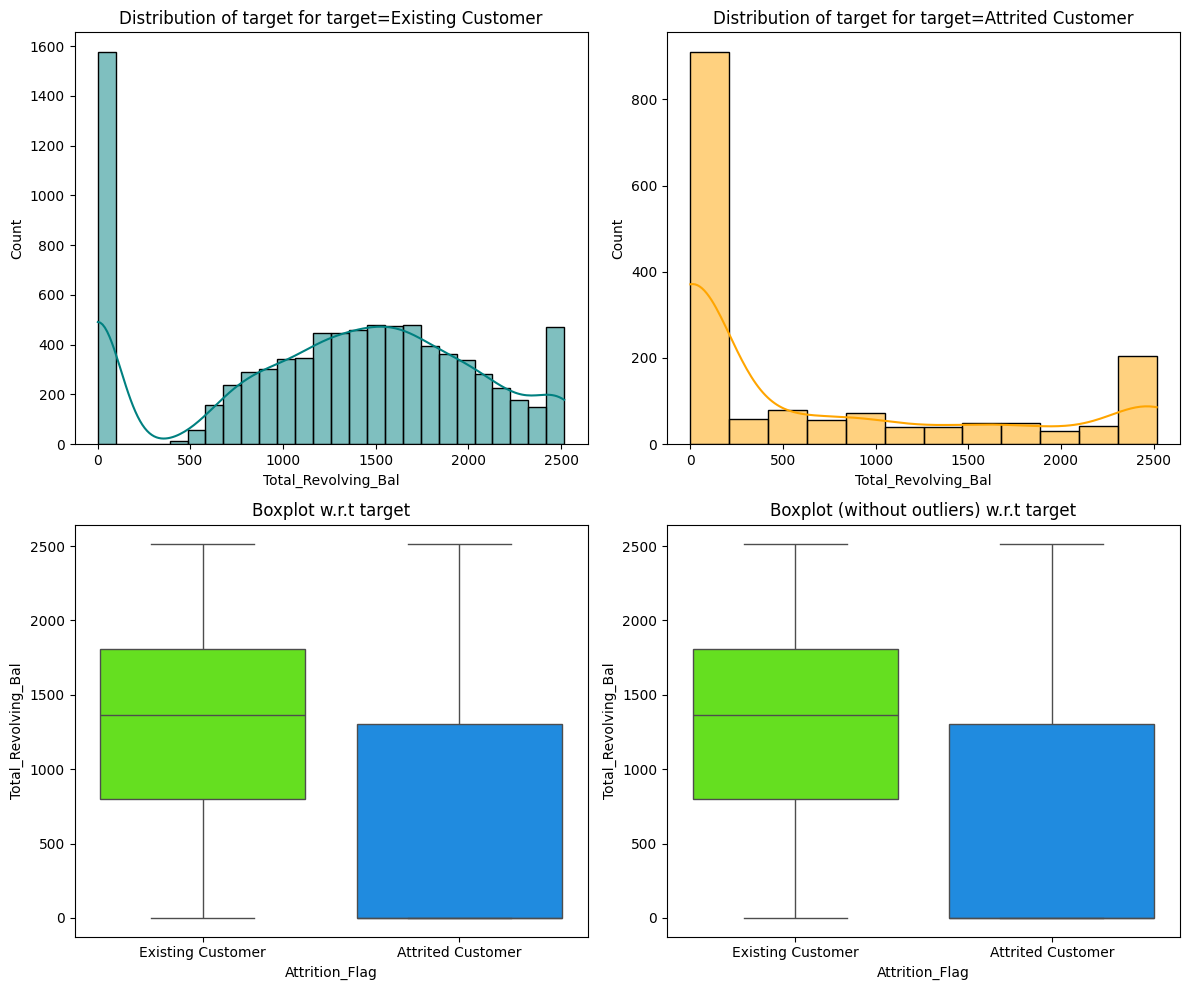

In [ ]:
# Relationship between Attrition Flag and Total Revolving Balance
distribution_plot_wrt_target(bankchurn_df,'Total_Revolving_Bal','Attrition_Flag')

- The revolving balance appears to be uniformly distributed with minimal skew, but it does not show any impact on customer attrition.

#### **Let's look at the relationship between Attrition Flag Loan and amount left on the credit card to use**

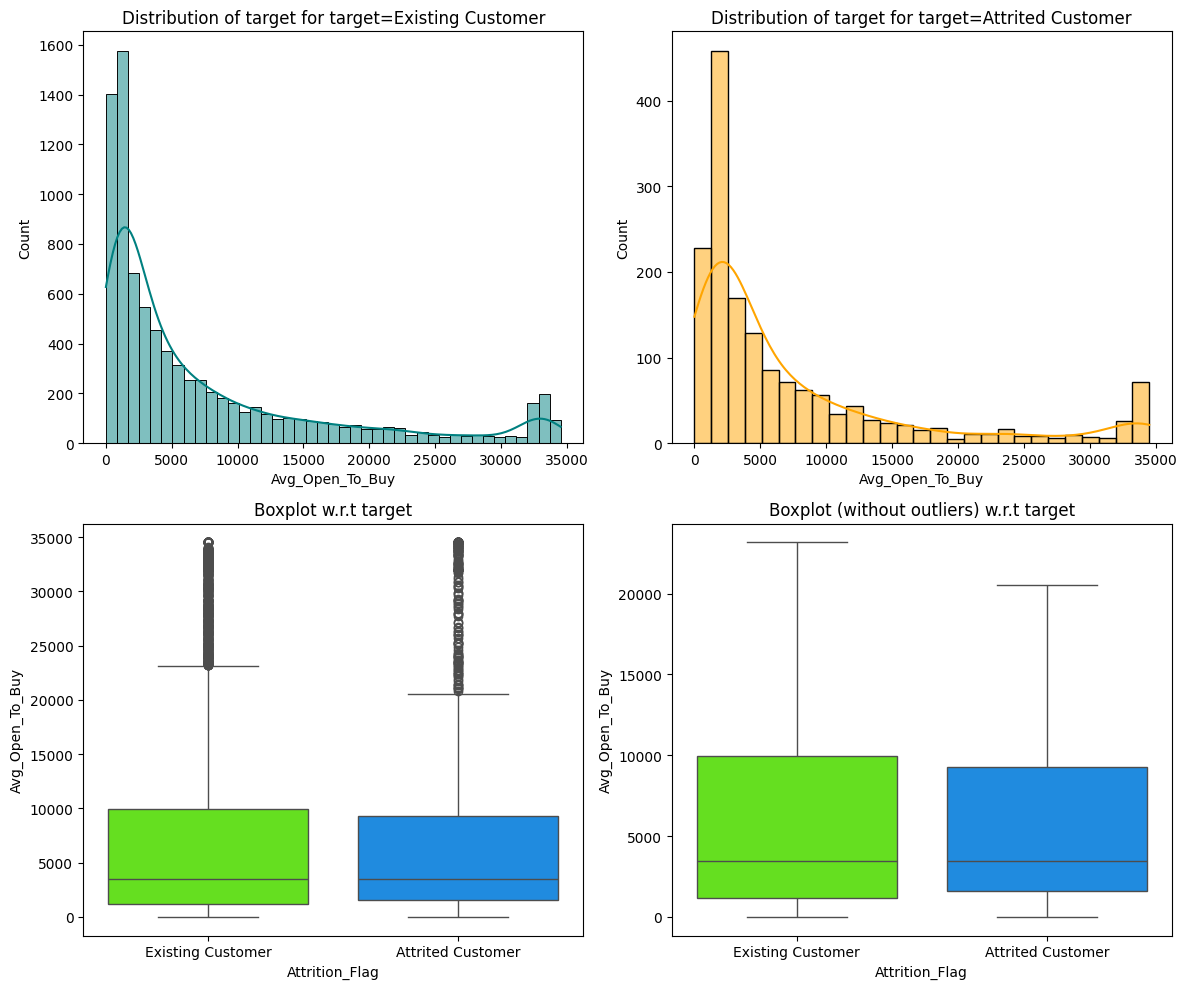

In [ ]:
# Relationship between Attrition Flag and amount left on the credit card to use
distribution_plot_wrt_target(bankchurn_df,'Avg_Open_To_Buy','Attrition_Flag')

- The average open-to-buy amount distribution is highly right-skewed with many outliers, but it does not show any relationship with whether customers will stop using bank services.

#### **Let's look at the relationship between Attrition Flag Loan and Total Transaction Amount**

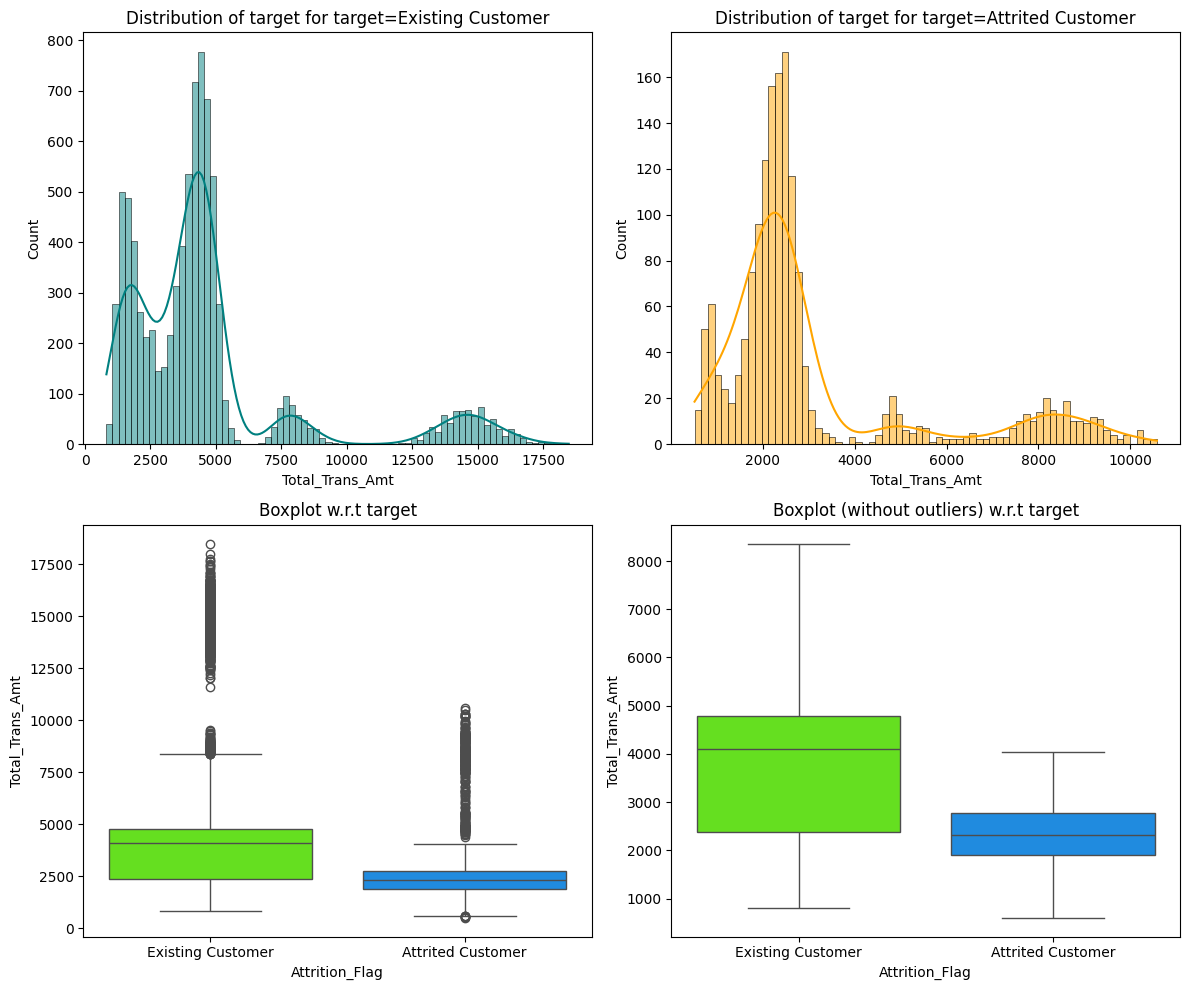

In [ ]:
# Relationship between Attrition Flag and Total Trans Amount
distribution_plot_wrt_target(bankchurn_df,'Total_Trans_Amt','Attrition_Flag')

- The total transaction amount distribution is right-skewed with many outliers.
- Customers with lower transaction amounts seem more likely to stop using bank services compared to those with higher transaction amounts.


#### **Let's look at the relationship between Attrition Flag Loan and Ratio of the total transaction amount in 4th quarter and the total transaction count in 1st quarter**

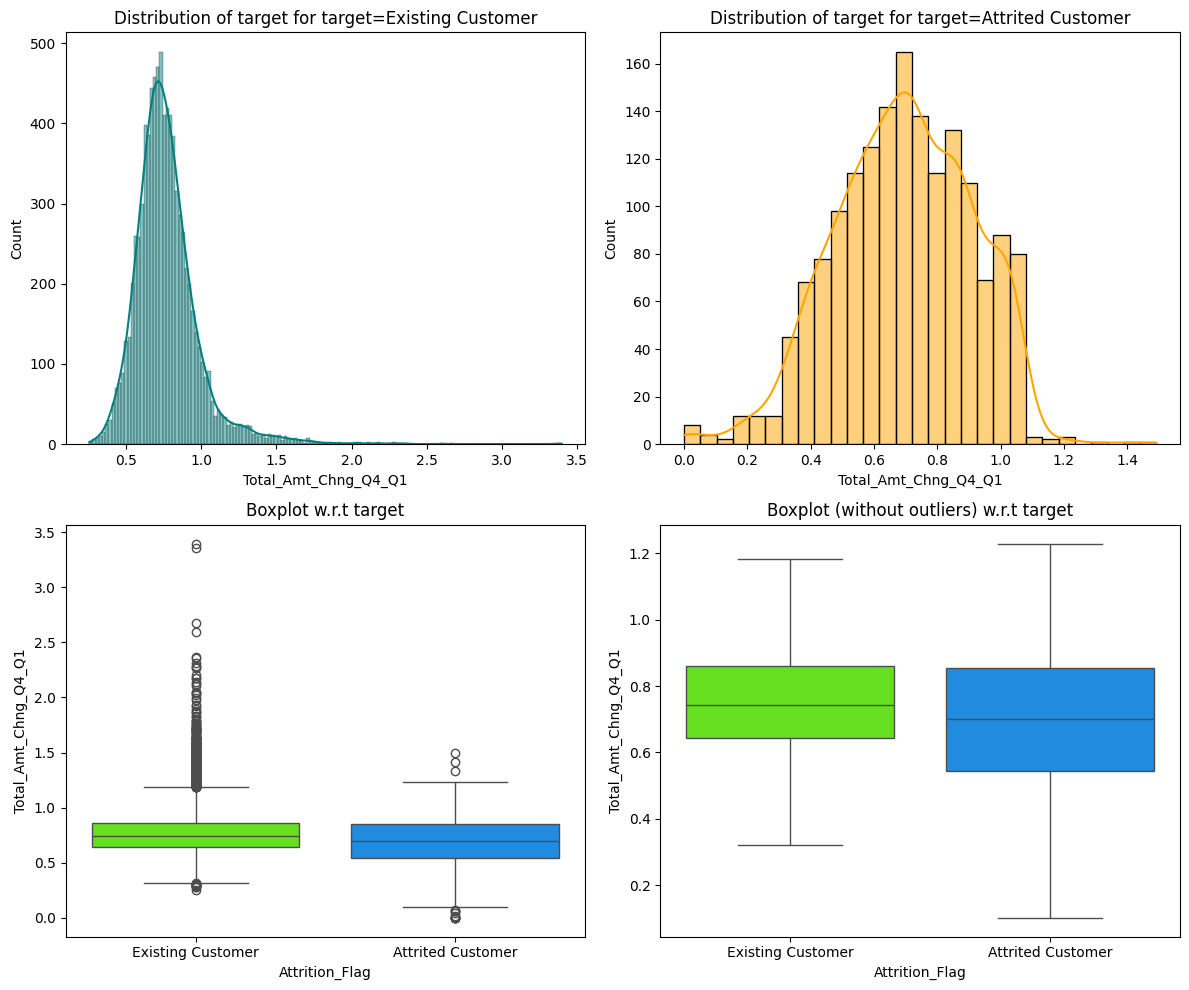

In [ ]:
# Relationship between Attrition Flag and Total_Amt_Chng_Q4_Q1
distribution_plot_wrt_target(bankchurn_df,'Total_Amt_Chng_Q4_Q1','Attrition_Flag')

- Most of the outliers in the ratio of the total transaction amount are not from customers who have churned.
- Customers with a ratio of the total transaction amount close to zero are the most likely to stop using bank services.

#### **Let's look at the relationship between Attrition Flag Loan and Total Transaction Count**

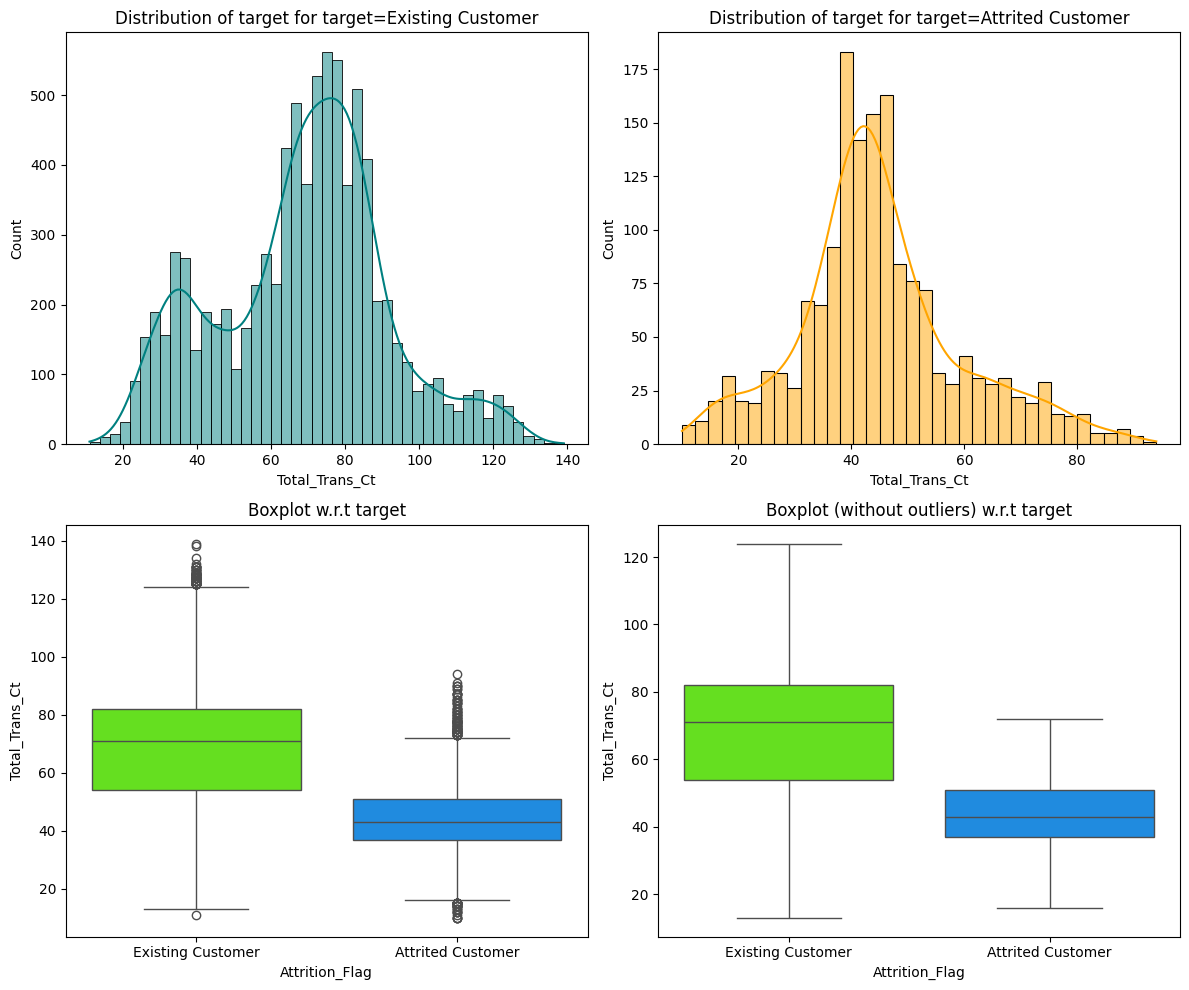

In [ ]:
# Relationship between Attrition Flag and Total Trans Count
distribution_plot_wrt_target(bankchurn_df,'Total_Trans_Ct','Attrition_Flag')

- Customers with a lower total transaction count in the last 12 months are more likely to churn compared to those who use their credit cards more frequently.
- According to the distribution, approximately 75% of customers with a total transaction count of less than 55 in the last 12 months have churned.

#### **Let's look at the relationship between Attrition Flag Loan and Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter**

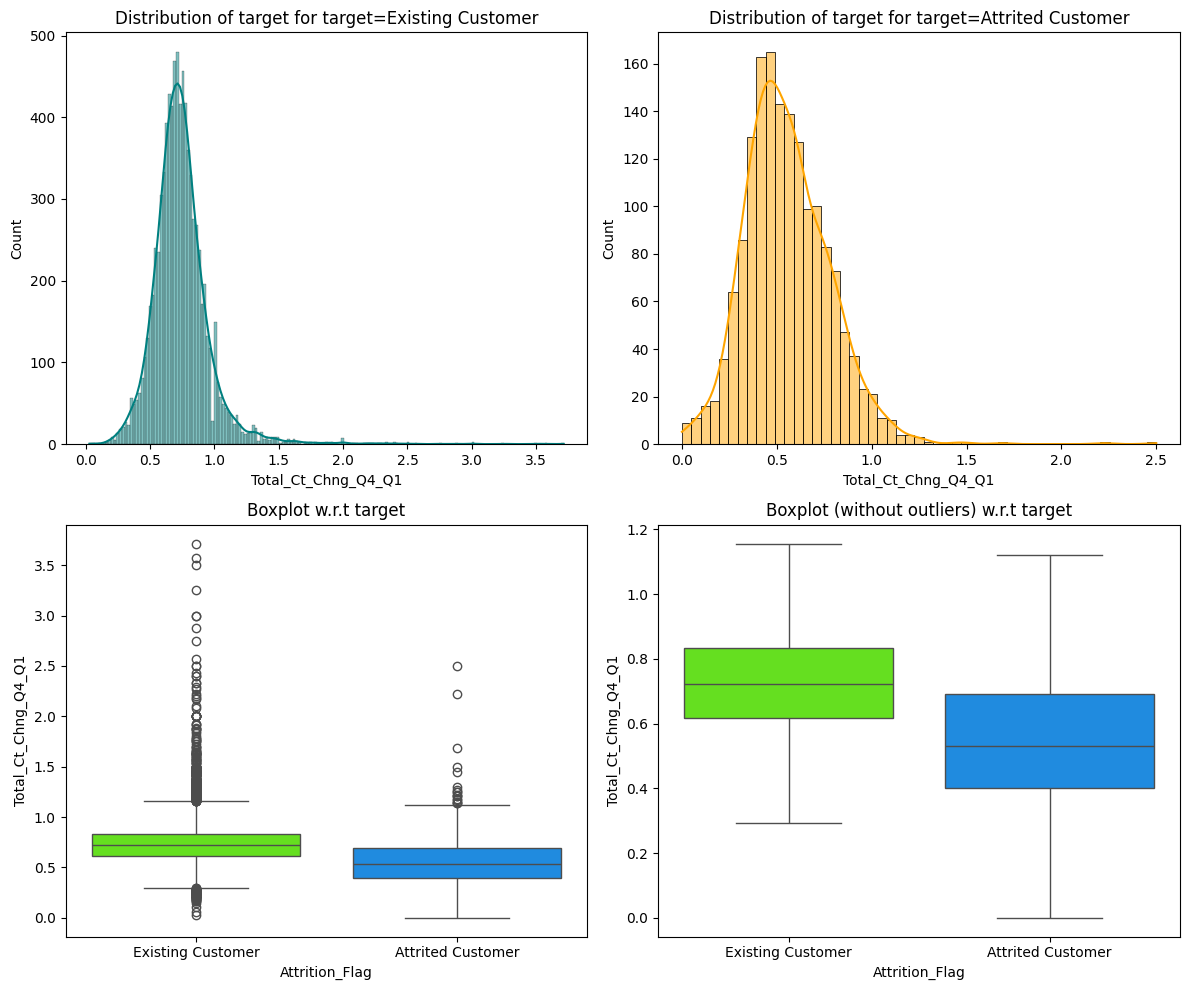

In [ ]:
# Relationship between Attrition Flag and Total_Ct_Chng_Q4_Q1
distribution_plot_wrt_target(bankchurn_df,'Total_Ct_Chng_Q4_Q1','Attrition_Flag')

- Most of the outliers in the ratio of the total transaction count are not from customers who have churned.
- Customers with a ratio of the total transaction count between 0 and 0.3 are the most likely to stop using bank services.

#### **Let's look at the relationship between Attrition Flag Loan and Average Utilization Ratio**

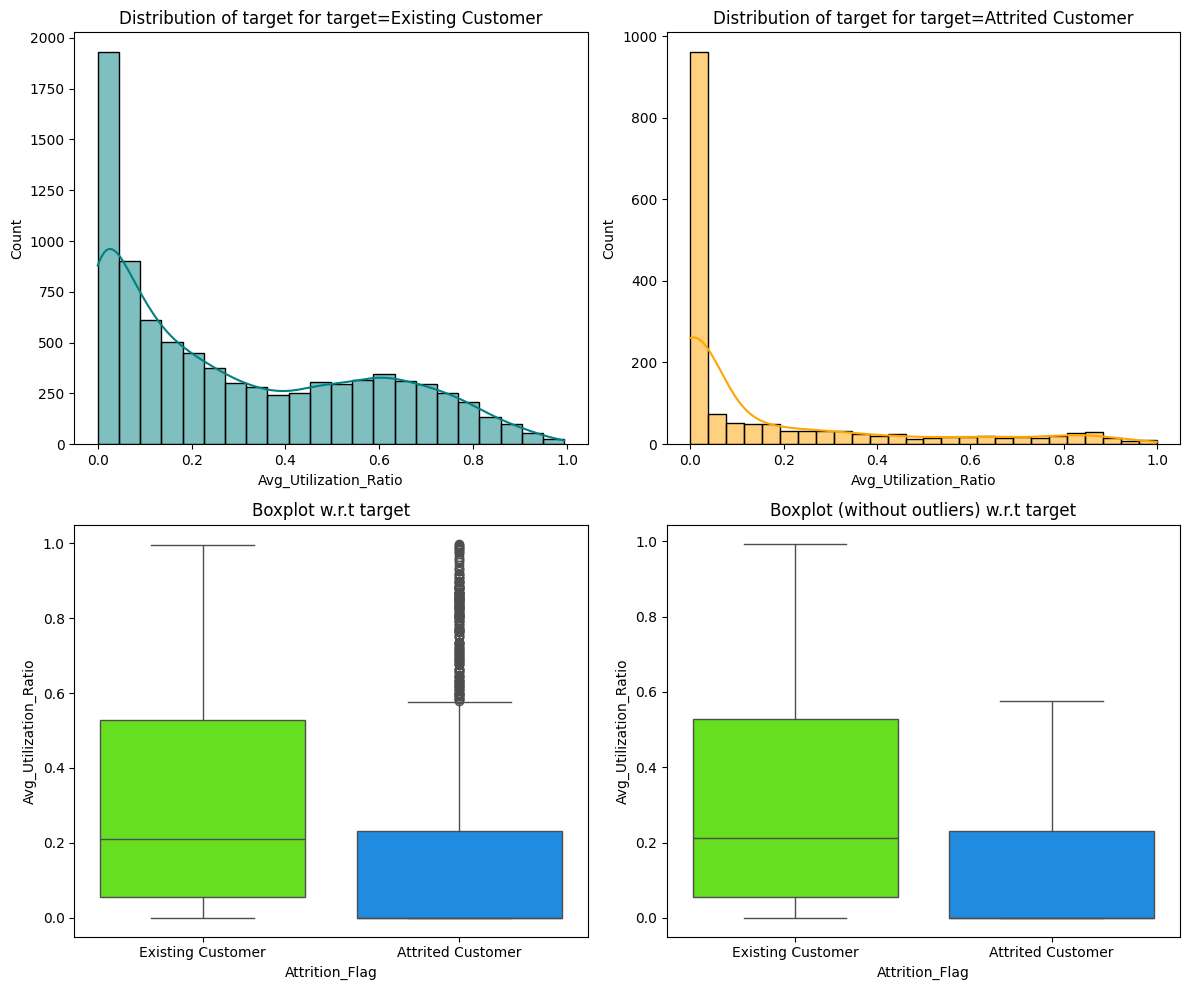

In [ ]:
# Relationship between Attrition Flag and Average Utilization Ratio
distribution_plot_wrt_target(bankchurn_df,'Avg_Utilization_Ratio','Attrition_Flag')

- The distribution of the Average Ratio of Available Credit the Customer Spent is highly right-skewed.
- Approximately 50% of customers who have attrited have an average ratio of less than 0.02, compared to 0.55 for non-attrited customers.
- All outliers in this distribution are from attrited customers only.

#### **Let's look at the co-relation between all numeric columns**

In [ ]:
# Replace the Attrition_Flag column value to 0 and 1
bankchurn_df['Attrition_Flag'] = bankchurn_df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

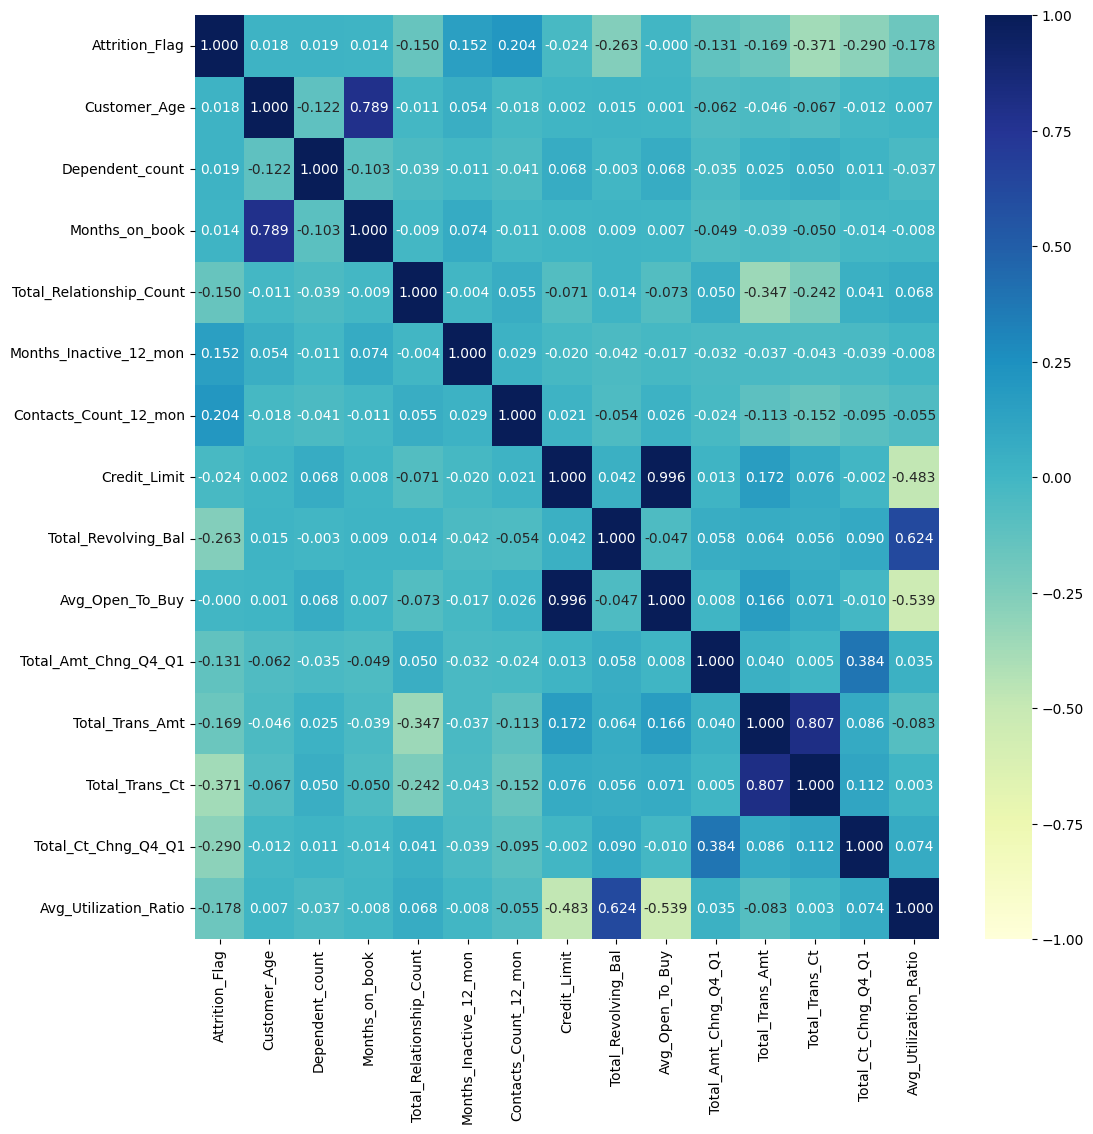

In [ ]:
# Co-relation between all numeric columns up to 3 decimals
plt.figure(figsize =(12,12))
sns.heatmap(data = bankchurn_df.select_dtypes(include=np.number).corr(),annot = True,cmap='YlGnBu',fmt=".3f",vmin=-1,vmax=1)
plt.show()

**Observations**

**Multicollinearity:**
- **Average Open to Buy and Credit Limit** are highly correlated, indicating multicollinearity.
- **Total Transaction Amount and Total Transaction Count** are highly correlated with each other.

**Customer Demographics and Relationships:**
- **Customer Age** and the **Customer’s Relationship with the Bank** show a high correlation.

**Credit Usage:**
- **Total Revolving Balance and Average Utilization Ratio** have a strong correlation.

**Transaction Changes:**
- **Total_Ct_Chng_Q4_Q1** (Change in Transaction Count) and **Total_Amt_Chng_Q4_Q1** (Change in Transaction Amount) are related.

**Attrition Factors:**
- The attrition status of customers has a very low correlation with **Contacts_Count_12_mon** (Number of Contacts in the Last 12 Months) and **Months_Inactive_12_mon** (Number of Months Inactive in the Last 12 Months).

#### **Let's look at the co-relation between all numeric columns**

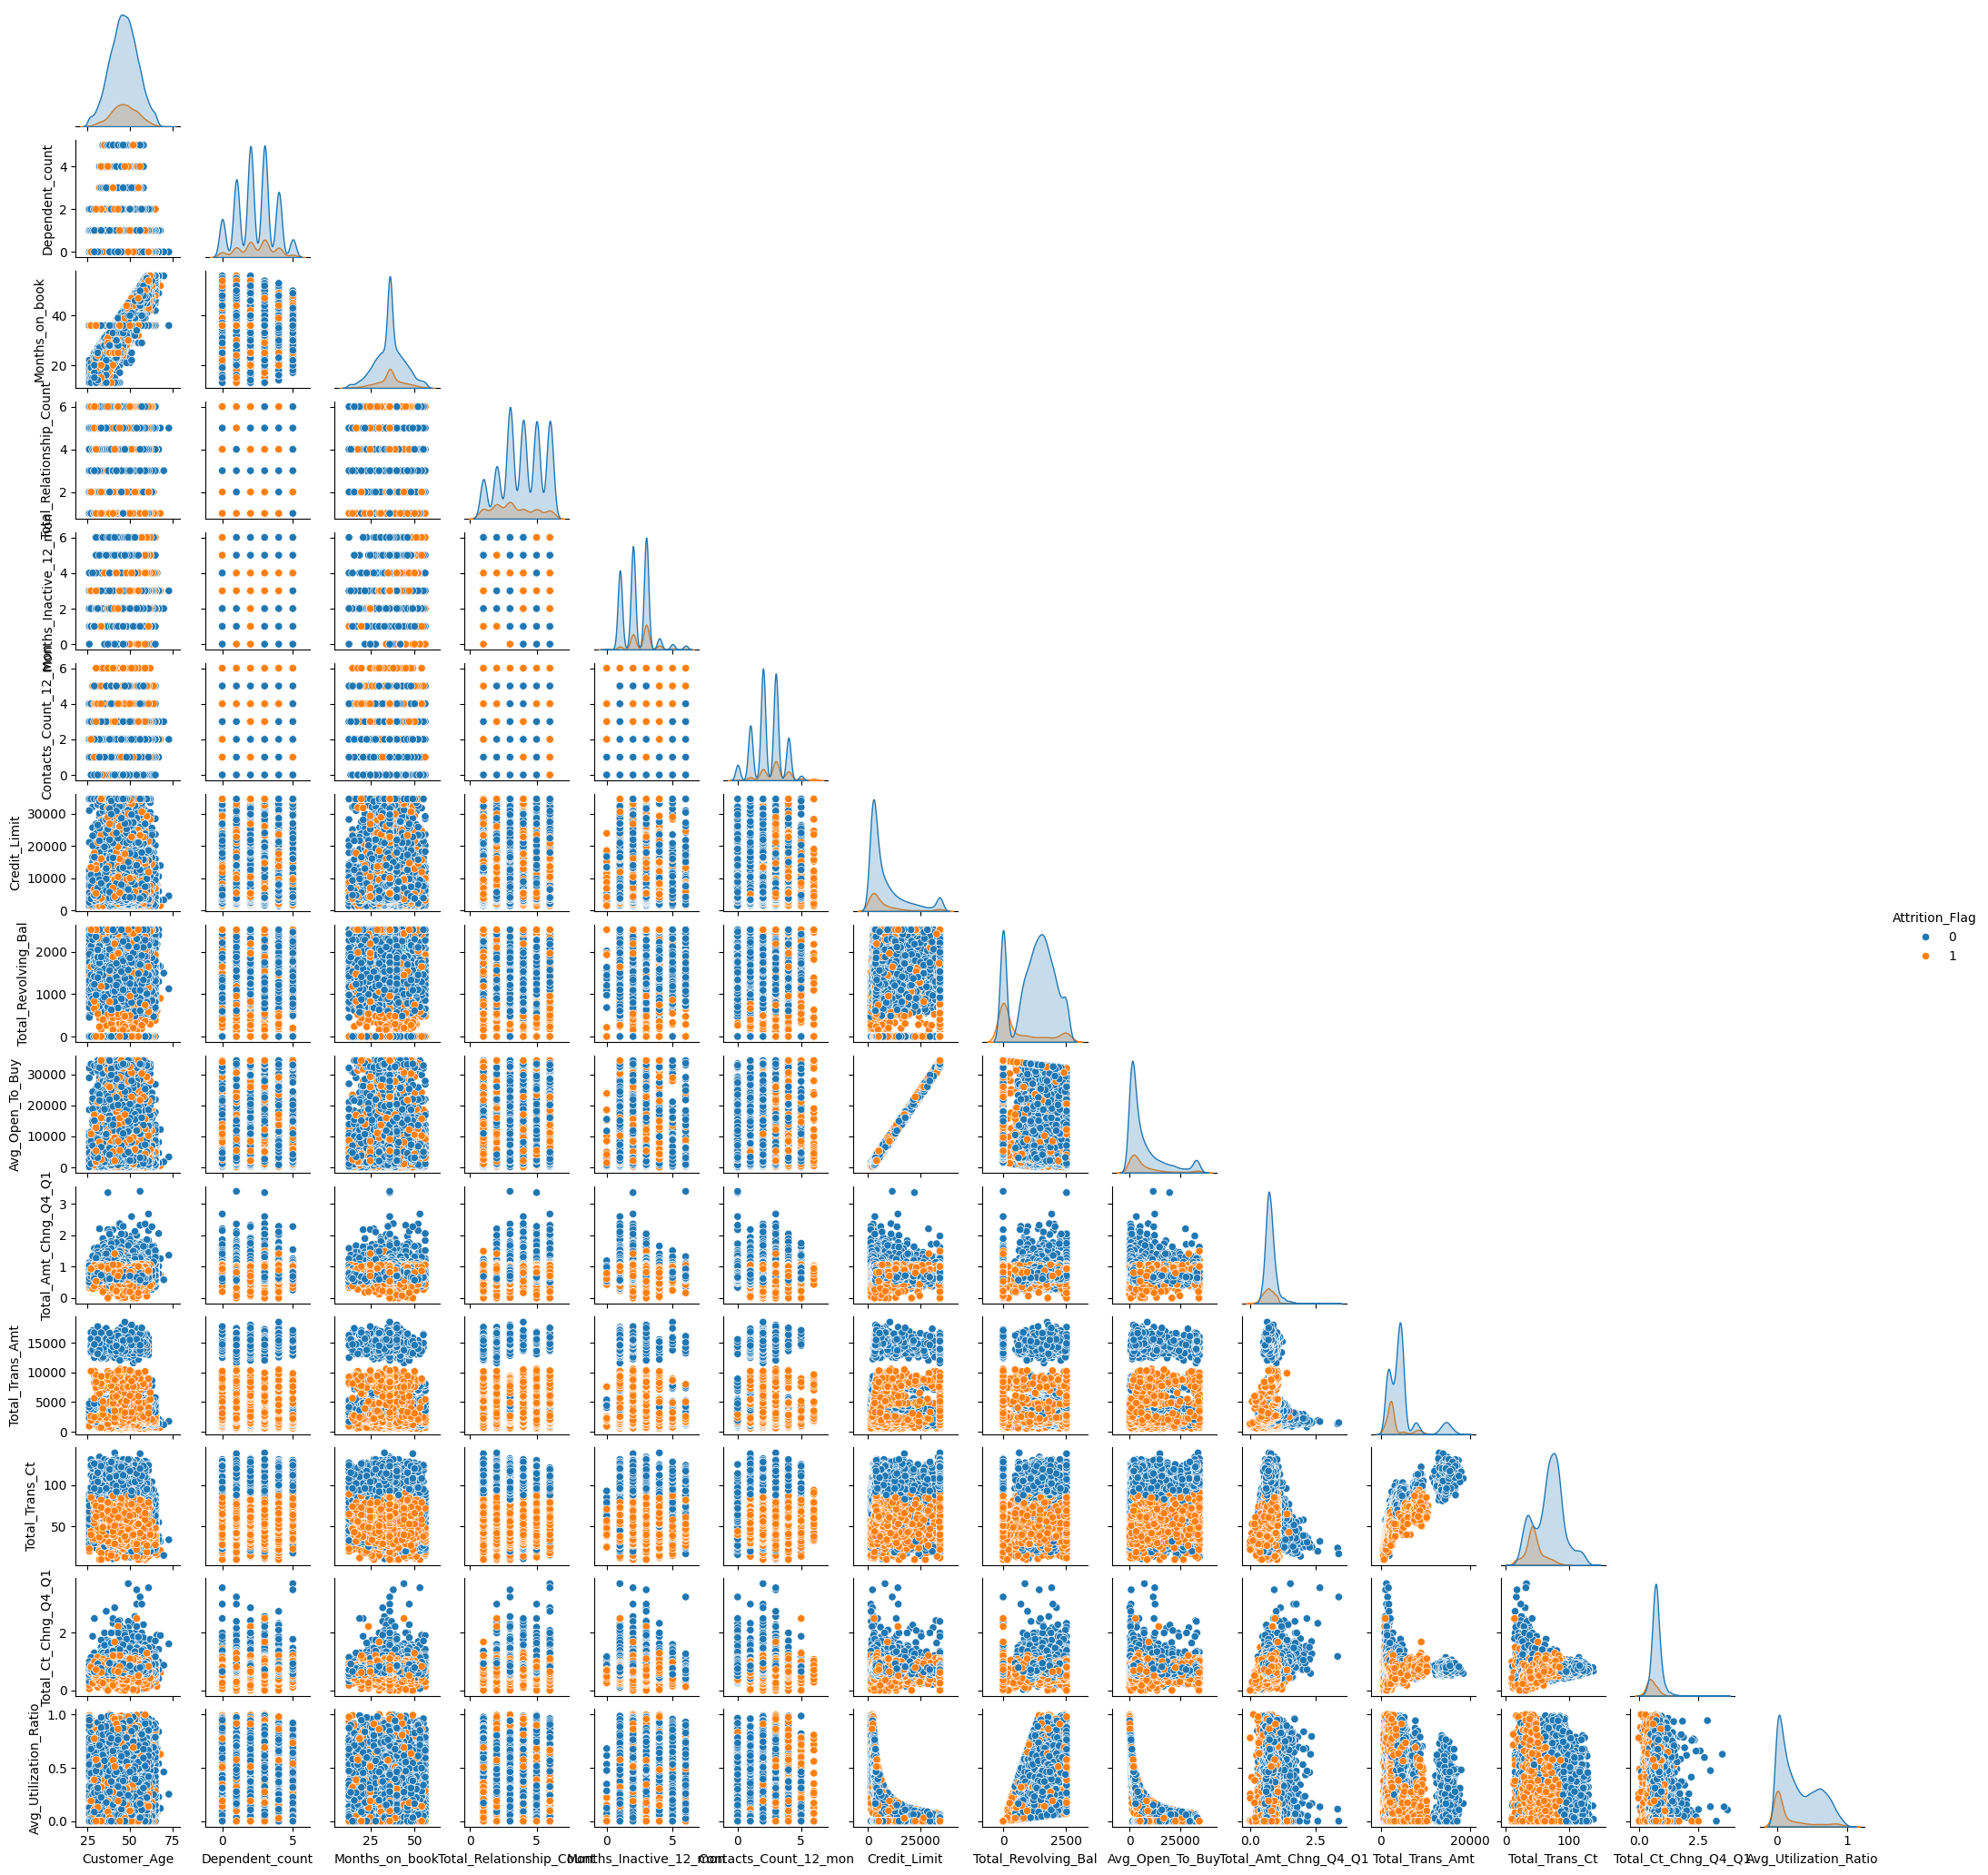

In [ ]:
# Relationship between all numeric columns
sns.pairplot(data=bankchurn_df,corner=True,hue='Attrition_Flag',height = 1.5);


## Data Pre-processing


### Outlier detection and treatment

In [ ]:
# Get the 25th percentile for each numeric columns
Quarter1 = bankchurn_df.select_dtypes(include=["float64", "int64"]).quantile(0.25)

# Get the 75th percentile for each numeric columns
Quarter3 = bankchurn_df.select_dtypes(include=["float64", "int64"]).quantile(0.75)

# Calculate Inter Quantile Range (75th perentile - 25th percentile)
IQR = Quarter3 - Quarter1

# Find lower and upper bounds for all values. All values outside these bounds are outliers
lower = Quarter1 - 1.5 * IQR
upper = Quarter3 + 1.5 * IQR

In [ ]:
# Find the Lower outliers range
Quarter1

Attrition_Flag                 0.000
Customer_Age                  41.000
Dependent_count                1.000
Months_on_book                31.000
Total_Relationship_Count       3.000
Months_Inactive_12_mon         2.000
Contacts_Count_12_mon          2.000
Credit_Limit                2555.000
Total_Revolving_Bal          359.000
Avg_Open_To_Buy             1324.500
Total_Amt_Chng_Q4_Q1           0.631
Total_Trans_Amt             2155.500
Total_Trans_Ct                45.000
Total_Ct_Chng_Q4_Q1            0.582
Avg_Utilization_Ratio          0.023
Name: 0.25, dtype: float64

In [ ]:
# Find the Upper outliers range
Quarter3

Attrition_Flag                  0.000
Customer_Age                   52.000
Dependent_count                 3.000
Months_on_book                 40.000
Total_Relationship_Count        5.000
Months_Inactive_12_mon          3.000
Contacts_Count_12_mon           3.000
Credit_Limit                11067.500
Total_Revolving_Bal          1784.000
Avg_Open_To_Buy              9859.000
Total_Amt_Chng_Q4_Q1            0.859
Total_Trans_Amt              4741.000
Total_Trans_Ct                 81.000
Total_Ct_Chng_Q4_Q1             0.818
Avg_Utilization_Ratio           0.503
Name: 0.75, dtype: float64

In [ ]:
# Check the Outlier percentage for each numeric column
((bankchurn_df.select_dtypes(include=["float64", "int64"]) < lower)
    |(bankchurn_df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(bankchurn_df) * 100

Attrition_Flag              16.065962
Customer_Age                 0.019749
Dependent_count              0.000000
Months_on_book               3.811593
Total_Relationship_Count     0.000000
Months_Inactive_12_mon       3.268490
Contacts_Count_12_mon        6.211119
Credit_Limit                 9.716599
Total_Revolving_Bal          0.000000
Avg_Open_To_Buy              9.509233
Total_Amt_Chng_Q4_Q1         3.910339
Total_Trans_Amt              8.847635
Total_Trans_Ct               0.019749
Total_Ct_Chng_Q4_Q1          3.890590
Avg_Utilization_Ratio        0.000000
dtype: float64

 - **Obesrvations**
  - Couple of columns has outliers but these are expected per the nature of information stored so no need to treat them.


### Income category column value has Anomalous values and need attention

In [ ]:
# Replace the "abc" income category to nan for imputaion
bankchurn_df['Income_Category'] = bankchurn_df['Income_Category'].replace('abc', np.nan)

### Train-Val-Test Split

In [ ]:
# defining the explanatory (independent) and response (dependent) variables
X = bankchurn_df.drop(['Attrition_Flag'], axis=1)
y = bankchurn_df['Attrition_Flag']

In [ ]:
# splitting the data in an 80:20 ratio for train and Test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RS)


# splitting the data in an 75:25 ratio for train and Validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=RS)

In [ ]:
# Print the shape of Train, Validation and test data set along with percentage to dispay proportion distribution
print("Shape of training set:", X_train.shape, y_train.shape)
print("Shape of validation set:", X_val.shape, y_val.shape)
print("Shape of test set:", X_test.shape, y_test.shape)
print('\n')
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in validation set:")
print(100*y_val.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

Shape of training set: (6075, 19) (6075,)
Shape of validation set: (2026, 19) (2026,)
Shape of test set: (2026, 19) (2026,)


Percentage of classes in training set:
Attrition_Flag
0    83.934156
1    16.065844
Name: proportion, dtype: float64 

Percentage of classes in validation set:
Attrition_Flag
0    83.909181
1    16.090819
Name: proportion, dtype: float64 

Percentage of classes in test set:
Attrition_Flag
0    83.958539
1    16.041461
Name: proportion, dtype: float64


### Missing value imputation




In [ ]:
# Instanciate SimpleImputer function to impute the values as a Mode in categorical columns
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Prepare list of categorial columns need missing value treatment
cols_to_impute = ['Education_Level','Marital_Status','Income_Category']

# fit and transform the imputer on train data
X_train[cols_to_impute] = imputer.fit_transform(X_train[cols_to_impute])

# Transform on validation and test data
X_val[cols_to_impute] = imputer.transform(X_val[cols_to_impute])
X_test[cols_to_impute] = imputer.transform(X_test[cols_to_impute])

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

### Encoding Categorial Variables

In [ ]:
# Print the list of all categorical valriables in Train, Validation and test data set.
print("Categorical columns with values in Training data\n")
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

print("\n\nCategorical columns with values in Valiation data\n")
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

print("\n\nCategorical columns with values in Test data\n")
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())


Categorical columns with values in Training data

Gender
F    3193
M    2882
Name: count, dtype: int64
******************************
Education_Level
Graduate         2782
High School      1228
Uneducated        881
College           618
Post-Graduate     312
Doctorate         254
Name: count, dtype: int64
******************************
Marital_Status
Married     3276
Single      2369
Divorced     430
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    2783
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: count, dtype: int64
******************************
Card_Category
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: count, dtype: int64
******************************


Categorical columns with values in Valiation data

Gender
F    1095
M     931
Name: count, dtype: int64
******************************
Education_Level
Graduate         917
High School      404
Uneducated      

In [ ]:
#Create dummies for all categorical columns in Train, Validation and Test data set
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [ ]:
#Print shape of Train, Validation and Test data set
print("Shape of training set:", X_train.shape)
print("Shape of validation set:", X_val.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (6075, 29)
Shape of validation set: (2026, 29)
Shape of test set: (2026, 29)


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

### Model Building with original data

* Prepare a list of all classifier models

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=RS)))
models.append(("Random forest", RandomForestClassifier(random_state=RS)))
models.append(("GBM", GradientBoostingClassifier(random_state=RS)))
models.append(("Adaboost", AdaBoostClassifier(random_state=RS)))
models.append(("Xgboost", XGBClassifier(random_state=RS, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=RS)))

- Train all basic classifier models with original data set and prepare dataframes to compare the recall score for Train set and validation set

In [ ]:
models_train_score = []  # Empty list to store all the training score
models_validation_score = []  # Empty list to store all the validation score

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    models_train_score.append((name,scores))
    scores_val = recall_score(y_val, model.predict(X_val))
    models_validation_score.append((name,scores_val))

#Convert models list into 2 columns data frame
models_train_score_df = pd.DataFrame(models_train_score, columns=['Model Name', 'Score'])
models_validation_score_df = pd.DataFrame(models_validation_score, columns=['Model Name', 'Score'])

# merge models_train_score_df and models_validation_score_df into one data frame
models_score_df = pd.merge(models_train_score_df, models_validation_score_df, on='Model Name', suffixes=('_train_original', '_val_original'))`

### Model Building with Oversampled data


In [ ]:
# Print the original Count of Labels in training set where Existing Customer = 0 and Attrited Customer = 1
print("Orginal Count of Labels \n")
print("Total counts of Attrited Customer : {}".format(sum(y_train == 1)))
print("Total counts of Existing Customer: {} \n".format(sum(y_train == 0)))

Orginal Count of Labels 

Total counts of Attrited Customer : 976
Total counts of Existing Customer: 5099 



* Due the imbalance of target class in original data set, let's use oversampling to overcome the class imbalance problem

In [ ]:
# Creat synthetic data to treat imbalance class distribution of traget variable
sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique

X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
# Print the Oversampled Count of Labels in training set where Existing Customer = 0 and Attrited Customer = 1
print("Oversampled Count of Labels \n")
print("Total counts of Attrited Customer : {}".format(sum(y_train_over == 1)))
print("Total counts of Existing Customer: {} \n".format(sum(y_train_over == 0)))

#Print the shape of oversampled data set
print("After Oversampling\n")
print("The shape of train_X: {}".format(X_train_over.shape))
print("The shape of train_y: {} \n".format(y_train_over.shape))

Oversampled Count of Labels 

Total counts of Attrited Customer : 5099
Total counts of Existing Customer: 5099 

After Oversampling

The shape of train_X: (10198, 29)
The shape of train_y: (10198,) 



- Train all basic classifier models with Oversampled data set and prepare dataframes to compare the recall score for Train set and validation set

In [ ]:
models_train_score_over = []  # Empty list to store all the training score
models_validation_score_over = []  # Empty list to store all the validation score

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    models_train_score_over.append((name,scores))
    scores_val = recall_score(y_val, model.predict(X_val))
    models_validation_score_over.append((name,scores_val))

#Convert models list into 2 columns data frame
models_train_score_over_df = pd.DataFrame(models_train_score_over, columns=['Model Name', 'Score'])
models_validation_score_over_df = pd.DataFrame(models_validation_score_over, columns=['Model Name', 'Score'])

# merge models_train_score_df, models_validation_score_df, models_train_score_df and models_validation_score_df into one data frame
models_score_over_df = pd.merge(models_train_score_over_df, models_validation_score_over_df, on='Model Name', suffixes=('_train_oversampled', '_val_oversampled'))

### Model Building with Undersampled data

In [ ]:
# Print the original Count of Labels in training set where Existing Customer = 0 and Attrited Customer = 1
print("Orginal Count of Labels \n")
print("Total counts of Attrited Customer : {}".format(sum(y_train == 1)))
print("Total counts of Existing Customer: {} \n".format(sum(y_train == 0)))

Orginal Count of Labels 

Total counts of Attrited Customer : 976
Total counts of Existing Customer: 5099 



* Due the imbalance of target class in original data set, let's use Undersampling to overcome the class imbalance problem

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
# Print the Undersampled Count of Labels in training set where Existing Customer = 0 and Attrited Customer = 1
print("Undersampled Count of Labels \n")
print("Total counts of Attrited Customer: {}".format(sum(y_train_un == 1)))
print("Total counts of Existing Customer: {} \n".format(sum(y_train_un == 0)))

#Print the shape of oversampled data set
print("After Undersampling\n")
print("The shape of train_X: {}".format(X_train_un.shape))
print("The shape of train_y: {} \n".format(y_train_un.shape))

Undersampled Count of Labels 

Total counts of Attrited Customer: 976
Total counts of Existing Customer: 976 

After Undersampling

The shape of train_X: (1952, 29)
The shape of train_y: (1952,) 



- Train all basic classifier models with Undersample data set and prepare dataframes to compare the recall score for Train set and validation set

In [ ]:
models_train_score_under = []  # Empty list to store all the training score
models_validation_score_under = []  # Empty list to store all the validation score

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    models_train_score_under.append((name,scores))
    scores_val = recall_score(y_val, model.predict(X_val))
    models_validation_score_under.append((name,scores_val))

#Convert models list into 2 columns data frame
models_train_score_under_df = pd.DataFrame(models_train_score_under, columns=['Model Name', 'Score'])
models_validation_score_under_df = pd.DataFrame(models_validation_score_under, columns=['Model Name', 'Score'])

# merge models_train_score_df, models_validation_score_df, models_train_score_df and models_validation_score_df into one data frame
models_score_under_df = pd.merge(models_train_score_under_df, models_validation_score_under_df, on='Model Name', suffixes=('_train_undersampled', '_val_undersampled'))

### Score comparison on Training and Validation score for basic models

In [ ]:
# merge models_score_df, models_score_over_df and models_score_under_df into one data frame
print("Recall Score comparison on Training and Validation score for basic models\n")
models_score_final_df = pd.merge(models_score_df, models_score_over_df, on='Model Name')
models_score_final_df = pd.merge(models_score_final_df, models_score_under_df, on='Model Name')
models_score_final_df

Recall Score comparison on Training and Validation score for basic models



Model Name  Score_train_original  Score_val_original  \
0        Bagging              0.985656            0.812883   
1  Random forest              1.000000            0.797546   
2            GBM              0.875000            0.855828   
3       Adaboost              0.826844            0.852761   
4        Xgboost              1.000000            0.901840   
5          dtree              1.000000            0.815951   

   Score_train_oversampled  Score_val_oversampled  Score_train_undersampled  \
0                 0.997647               0.861963                  0.990779   
1                 1.000000               0.861963                  1.000000   
2                 0.979212               0.904908                  0.980533   
3                 0.964699               0.901840                  0.952869   
4                 1.000000               0.929448                  1.000000   
5                 1.000000               0.865031                  1.000000   

   Score_val_undersampled  
0                0.929448  
1                0.938650  
2                0.957055  
3                0.960123  
4                0.969325  
5                0.920245

- **Observations**
  - **Decision Tree** Appears to be overfitting on original, oversampled, and undersampled training sets, and performs poorly on the validation set.
  - **Random forest** Also shows signs of overfitting on original, oversampled, and undersampled training sets, resulting in poor performance on the validation set.
  - **Bagging model** Nearly overfits on original, oversampled, and undersampled training sets, and performs poorly on the validation set.
  - **Adaboost model**
    - Performs very well on the original dataset for both training and validation sets.
    - Performs adequately on the oversampled dataset for both training and validation sets.
    - Performs well on the undersampled dataset for both training and validation sets.
  - **GBM**
    - Performs well on the original and oversampled datasets for both training and validation sets.
    - Performs adequately on the undersampled dataset for both training and validation sets.
  - **XGBoost**
    - Shows signs of overfitting on original, oversampled, and undersampled training sets.
    - Performs adequately on the undersampled dataset for the validation set.
    
**Next Steps**
 - Let’s proceed to tune these models to determine which one performs best on both training and validation sets, aiming to achieve the highest Recall score.

## HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Tuned Decision tree

In [ ]:
# defining model
dt_tuned_model = DecisionTreeClassifier(random_state=RS)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=dt_tuned_model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.751941391941392:


##### Tuned Decision tree with Original data

In [ ]:
# Build a DecisionTreeClassifier model for paremeters from randomized_cv
dt_tuned_model = DecisionTreeClassifier(random_state=RS,
                                        max_depth=randomized_cv.best_params_['max_depth'],
                                        min_samples_leaf=randomized_cv.best_params_['min_samples_leaf'],
                                        max_leaf_nodes=randomized_cv.best_params_['max_leaf_nodes'],
                                        min_impurity_decrease=randomized_cv.best_params_['min_impurity_decrease'])

# Train model with original data set
dt_tuned_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

In [ ]:
# Calculating different metrics on train set
dt_train = model_performance_classification_sklearn(
    dt_tuned_model, X_train, y_train
)
print("Training performance:")
dt_train

Training performance:


Accuracy    Recall  Precision        F1
0  0.938765  0.805328   0.811983  0.808642

In [ ]:
# Calculating different metrics on validation set
dt_val = model_performance_classification_sklearn(
    dt_tuned_model, X_val, y_val
)
print("Validation performance:")
dt_val

Validation performance:


Accuracy    Recall  Precision       F1
0  0.930405  0.782209   0.784615  0.78341

* **Observations**
  - The tuned decision tree model looks well generalized for Train and Validation data sets


##### Tuned Decision tree with oversampled data

In [ ]:
# Train model with Oversamnpled data set
dt_tuned_model.fit(X_train_over,y_train_over)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

In [ ]:
# Calculating different metrics on train set
dt_train_over = model_performance_classification_sklearn(
    dt_tuned_model, X_train_over, y_train_over
)
print("Training performance:")
dt_train_over

Training performance:


Accuracy    Recall  Precision        F1
0  0.917141  0.910963   0.922359  0.916626

In [ ]:
# Calculating different metrics on validation set
dt_val_over = model_performance_classification_sklearn(
    dt_tuned_model, X_val, y_val
)
print("Validation performance:")
dt_val_over

Validation performance:


Accuracy    Recall  Precision        F1
0  0.914116  0.886503   0.678404  0.768617

* **Observations**
  - The tuned decision tree with oversmapled data set model looks well generalized for Train and Validation data sets for recall but perform poorly on Precision and F1

##### Tuned Decision tree with undersampled data

In [ ]:
# Train model with Undersampled data set
dt_tuned_model.fit(X_train_un,y_train_un)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

In [ ]:
# Calculating different metrics on train set
dt_train_under = model_performance_classification_sklearn(
    dt_tuned_model, X_train_un, y_train_un
)
print("Training performance:")
dt_train_under

Training performance:


Accuracy    Recall  Precision        F1
0  0.913934  0.939549   0.893762  0.916084

In [ ]:
# Calculating different metrics on validation set
dt_val_under = model_performance_classification_sklearn(
    dt_tuned_model, X_val, y_val
)
print("Validation performance:")
dt_val_under

Validation performance:


Accuracy    Recall  Precision        F1
0  0.867226  0.920245   0.552486  0.690449

* **Observations**
  - The tuned decision tree with undersampled data set model looks well generalized for Train and Validation data sets for recall but perform poorly on Accuracy, Precision and F1

#### Tuned Bagging Model

In [ ]:
# defining BaggingClassifier model
bag_tuned_model = BaggingClassifier(random_state=RS)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

#Calling RandomizedSearchCV
bag_randomized_cv = RandomizedSearchCV(estimator=bag_tuned_model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=RS)

#Fitting parameters in RandomizedSearchCV
bag_randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(bag_randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.8, 'max_features': 0.9} with CV score=0.751941391941392:


In [ ]:
print("Best parameters are {} with CV score={}:" .format(bag_randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.8, 'max_features': 0.9} with CV score=0.751941391941392:


##### Tuned Bagging Model with Original Data

In [ ]:
# Build a DecisionTreeClassifier model for paremeters from randomized_cv
bag_tuned_model = BaggingClassifier(random_state=RS,
                                    max_samples=bag_randomized_cv.best_params_['max_samples'],
                                    max_features=bag_randomized_cv.best_params_['max_features'],
                                    n_estimators=bag_randomized_cv.best_params_['n_estimators'])

# Train model with original data set
bag_tuned_model.fit(X_train,y_train)


BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=70,
                  random_state=1)

In [ ]:
# Calculating different metrics on train set
bag_train = model_performance_classification_sklearn(
    bag_tuned_model, X_train, y_train
)
print("Training performance:")
bag_train


Training performance:


Accuracy    Recall  Precision        F1
0  0.999342  0.996926   0.998973  0.997949

In [ ]:
# Calculating different metrics on Validation set
bag_val = model_performance_classification_sklearn(
    bag_tuned_model, X_val, y_val
)
print("Validation performance:")
bag_val

Validation performance:


Accuracy    Recall  Precision        F1
0  0.962981  0.849693   0.914191  0.880763

* **Observations**
  - The tuned Bagging classifier with original looks overfitted for Train and not performing well on Validation data for recall also perform poorly on Precision and F1

##### Tuned Bagging Model with Oversampled Data

In [ ]:
# Train model with Oversamnpled data set
bag_tuned_model.fit(X_train_over,y_train_over)

BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=70,
                  random_state=1)

In [ ]:
# Calculating different metrics on train set
bag_train_over = model_performance_classification_sklearn(
    bag_tuned_model, X_train_over, y_train_over
)
print("Training performance:")
bag_train_over

Training performance:


Accuracy  Recall  Precision        F1
0  0.999902     1.0   0.999804  0.999902

In [ ]:
# Calculating different metrics on Validation set
bag_val_over = model_performance_classification_sklearn(
    bag_tuned_model, X_val, y_val
)
print("Validation performance:")
bag_val_over

Validation performance:


Accuracy    Recall  Precision        F1
0  0.957552  0.917178   0.835196  0.874269

* **Observations**
  - The tuned Bagging classifier with Oversampled data is overfitted for Train and not performing well on Validation data for recall also perform poorly on Precision and F1

##### Tuned Bagging Model with Undersampled Data

In [ ]:
# Train model with Undersamnpled data set
bag_tuned_model.fit(X_train_un,y_train_un)

BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=70,
                  random_state=1)

In [ ]:
# Calculating different metrics on train set
bag_train_under = model_performance_classification_sklearn(
    bag_tuned_model, X_train_un, y_train_un
)
print("Training performance:")
bag_train_under


Training performance:


Accuracy    Recall  Precision        F1
0  0.998975  0.998975   0.998975  0.998975

In [ ]:
# Calculating different metrics on Validation set
bag_val_under = model_performance_classification_sklearn(
    bag_tuned_model, X_val, y_val
)
print("Validation performance:")
bag_val_under

Validation performance:


Accuracy    Recall  Precision        F1
0  0.929418  0.947853   0.710345  0.812089

* **Observations**
  - The tuned Bagging classifier with Undersampled data is overfitted for Train and not performing well on Validation data for recall also perform poorly on Precision and F1

#### Tuned RandomForest model

In [ ]:
# defining RandomForsst model
rf_tuned_model = RandomForestClassifier(random_state=RS)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=rf_tuned_model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=RS)


#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 25, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.7397435897435898:


##### Tuned RandomForest Model with Original Data

In [ ]:
# Build a DecisionTreeClassifier model for paremeters from randomized_cv
rf_tuned_model = RandomForestClassifier(random_state=RS,
                                        n_estimators=randomized_cv.best_params_['n_estimators'],
                                        min_samples_leaf=randomized_cv.best_params_['min_samples_leaf'],
                                        max_features=randomized_cv.best_params_['max_features'],
                                        max_samples=randomized_cv.best_params_['max_samples'])

# Train model with original data set
rf_tuned_model.fit(X_train,y_train)

RandomForestClassifier(max_samples=0.6, n_estimators=25, random_state=1)

In [ ]:
# Calculating different metrics on train set
rf_train = model_performance_classification_sklearn(
    rf_tuned_model, X_train, y_train
)
print("Training performance:")
rf_train

Training performance:


Accuracy    Recall  Precision        F1
0  0.995226  0.973361   0.996852  0.984966

In [ ]:
# Calculating different metrics on Validation set
rf_val = model_performance_classification_sklearn(
    rf_tuned_model, X_val, y_val
)
print("Validation performance:")
rf_val

Validation performance:


Accuracy    Recall  Precision        F1
0  0.952616  0.782209   0.910714  0.841584

* **Observations**
  - The tuned Random Forest with Original data is overfitted for Train and not performing well on Validation data for recall also perform poorly on Precision and F1

##### Tuned RandomForest Model with Oversampled Data

In [ ]:
# Train model with Oversamnpled data set
rf_tuned_model.fit(X_train_over,y_train_over)

RandomForestClassifier(max_samples=0.6, n_estimators=25, random_state=1)

In [ ]:
# Calculating different metrics on train set
rf_train_over = model_performance_classification_sklearn(
    rf_tuned_model, X_train_over, y_train_over
)
print("Training performance:")
rf_train_over

Training performance:


Accuracy    Recall  Precision        F1
0  0.997352  0.998627   0.996088  0.997356

In [ ]:
# Calculating different metrics on Validation set
rf_val_over = model_performance_classification_sklearn(
    rf_tuned_model, X_val, y_val
)
print("Validation performance:")
rf_val_over

Validation performance:


Accuracy    Recall  Precision        F1
0  0.947187  0.846626   0.828829  0.837633

* **Observations**
  - The tuned Random Forest with Oversampled data is overfitted for Train and not performing well on Validation data for recall also perform poorly on Precision and F1

##### Tuned RandomForest Model with Undersampled Data

In [ ]:
# Train model with Undersamnpled data set
rf_tuned_model.fit(X_train_un,y_train_un)

RandomForestClassifier(max_samples=0.6, n_estimators=25, random_state=1)

In [ ]:
# Calculating different metrics on train set
rf_train_under = model_performance_classification_sklearn(
    rf_tuned_model, X_train_un, y_train_un
)
print("Training performance:")
rf_train_under

Training performance:


Accuracy    Recall  Precision       F1
0  0.991803  0.993852   0.989796  0.99182

In [ ]:
# Calculating different metrics on Validation set
rf_val_under = model_performance_classification_sklearn(
    rf_tuned_model, X_val, y_val
)
print("Validation performance:")
rf_val_under

Validation performance:


Accuracy    Recall  Precision        F1
0  0.923001  0.932515   0.694064  0.795812

* **Observations**
  - The tuned Random Forest with Undersampled data is overfitted for Train and not performing well on Validation data for recall also perform poorly on Precision and F1

#### Tuned Adaboost Model

In [ ]:
# defining Adaboost model
ad_tuned_model = AdaBoostClassifier(random_state=RS)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

#Calling RandomizedSearchCV for Adaboost
adaboost_cv = RandomizedSearchCV(estimator=ad_tuned_model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=RS)

#Fitting parameters in RandomizedSearchCV
adaboost_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(adaboost_cv.best_params_,adaboost_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8360596546310832:


##### Tuned Adaboost Model with Original Data

In [ ]:
# Build a Adaboost model for paremeters from randomized_cv
ad_tuned_model = AdaBoostClassifier(random_state=RS,
                                    n_estimators=adaboost_cv.best_params_['n_estimators'],
                                    learning_rate=adaboost_cv.best_params_['learning_rate'],
                                    base_estimator=adaboost_cv.best_params_['base_estimator'])

# Train model with original data set
ad_tuned_model.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [ ]:
# Calculating different metrics on train set
ad_train = model_performance_classification_sklearn(
    ad_tuned_model, X_train, y_train
)
print("Training performance:")
ad_train

Training performance:


Accuracy    Recall  Precision        F1
0  0.982222  0.927254   0.960722  0.943691

In [ ]:
# Calculating different metrics on Validation set
ad_val = model_performance_classification_sklearn(
    ad_tuned_model, X_val, y_val
)
print("Validation performance:")
ad_val

Validation performance:


Accuracy    Recall  Precision      F1
0   0.96693  0.855828    0.93311  0.8928

* **Observations**
  - The tuned Adaboost model with Original data works fine for Train data set but not performing well on Validation data for recall also perform poorly on F1

##### Tuned Adaboost Model with Oversampled Data

In [ ]:
# Train model with Oversamnpled data set
ad_tuned_model.fit(X_train_over,y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [ ]:
# Calculating different metrics on train set
ad_train_over = model_performance_classification_sklearn(
    ad_tuned_model, X_train_over, y_train_over
)
print("Training performance:")
ad_train_over

Training performance:


Accuracy    Recall  Precision        F1
0  0.984605  0.984507     0.9847  0.984603

In [ ]:
# Calculating different metrics on Validation set
ad_val_over = model_performance_classification_sklearn(
    ad_tuned_model, X_val, y_val
)
print("Validation performance:")
ad_val_over

Validation performance:


Accuracy    Recall  Precision        F1
0  0.967917  0.907975    0.89426  0.901065

* **Observations**
  - The tuned Adaboost model with Oversampled data is overfitted for Train and not performing well on Validation data for recall also perform poorly on Precision and F1

##### Tuned Adaboost Model with Undersampled Data

In [ ]:
# Train model with Undersampled data set
ad_tuned_model.fit(X_train_un,y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [ ]:
# Calculating different metrics on train set
ad_train_under = model_performance_classification_sklearn(
    ad_tuned_model, X_train_un, y_train_un
)
print("Training performance:")
ad_train_under

Training performance:


Accuracy    Recall  Precision        F1
0  0.992316  0.996926   0.987817  0.992351

In [ ]:
# Calculating different metrics on Validation set
ad_val_under = model_performance_classification_sklearn(
    ad_tuned_model, X_val, y_val
)
print("Validation performance:")
ad_val_under

Validation performance:


Accuracy    Recall  Precision        F1
0  0.938302  0.966258   0.734266  0.834437

* **Observations**
  - The tuned Adaboost model with Undersampled data seems generalize for Train data set and performing well on Validation data for recall but perform poorly on Precision and F1

#### Tuned GradientBoosting Model

In [ ]:
# defining GradientBoosting model
gb_tuned_model = GradientBoostingClassifier(random_state=RS)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

#Calling RandomizedSearchCV for GradientBoosting
gboost_cv = RandomizedSearchCV(estimator=gb_tuned_model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=RS)

#Fitting parameters in RandomizedSearchCV
gboost_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(gboost_cv.best_params_,gboost_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.7683987441130298:


##### Tuned GradientBoosting Model with Original Data

In [ ]:
# Build a GradientBoosting model for paremeters from randomized_cv
gb_tuned_model = GradientBoostingClassifier(random_state=RS,
                                            init=gboost_cv.best_params_['init'],
                                            n_estimators=gboost_cv.best_params_['n_estimators'],
                                            learning_rate=gboost_cv.best_params_['learning_rate'],
                                            subsample=gboost_cv.best_params_['subsample'],
                                            max_features=gboost_cv.best_params_['max_features'])

# Train model with original data set
gb_tuned_model.fit(X_train,y_train)


GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.7)

In [ ]:
# Calculating different metrics on train set
gb_train = model_performance_classification_sklearn(
    gb_tuned_model, X_train, y_train
)
print("Training performance:")
gb_train

Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [ ]:
# Calculating different metrics on Validation set
gb_val = model_performance_classification_sklearn(
    gb_tuned_model, X_val, y_val
)
print("Validation performance:")
gb_val

Validation performance:


Accuracy    Recall  Precision        F1
0  0.938796  0.815951   0.806061  0.810976

* **Observations**
  - The tuned GBM with original data is overfitted for Train and not performing well on Validation data sets.

##### Tuned GradientBoosting Model with Oversampled Data

In [ ]:
# Train model with Oversampled data set
gb_tuned_model.fit(X_train_over,y_train_over)

GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.7)

In [ ]:
# Calculating different metrics on train set
gb_train_over = model_performance_classification_sklearn(
    gb_tuned_model, X_train_over, y_train_over
)
print("Training performance:")
gb_train_over

Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [ ]:
# Calculating different metrics on Validation set
gb_val_over = model_performance_classification_sklearn(
    gb_tuned_model, X_val, y_val
)
print("Validation performance:")
gb_val_over

Validation performance:


Accuracy    Recall  Precision        F1
0  0.934353  0.865031   0.760108  0.809182

* **Observations**
  - The tuned GBM with Oversampled data is overfitted for Train and not performing well on Validation data sets.

##### Tuned GradientBoosting Model with Undersampled Data

In [ ]:
# Train model with Undersampled data set
gb_tuned_model.fit(X_train_un,y_train_un)

GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.7)

In [ ]:
# Calculating different metrics on train set
gb_train_under = model_performance_classification_sklearn(
    gb_tuned_model, X_train_un, y_train_un
)
print("Training performance:")
gb_train_under

Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [ ]:
# Calculating different metrics on Validation set
gb_val_under = model_performance_classification_sklearn(
    gb_tuned_model, X_val, y_val
)
print("Validation performance:")
gb_val_under

Validation performance:


Accuracy    Recall  Precision        F1
0  0.894867  0.920245   0.616016  0.738007

* **Observations**
  - The tuned GBM with Undersampled data is overfitted for Train and not performing well on Validation data sets.

#### Tuned XGBoost Model

In [ ]:
# defining XGBoost model
xgb_tuned_model = XGBClassifier(random_state=RS, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

#Calling RandomizedSearchCV for XGBoost
xgb_cv = RandomizedSearchCV(estimator=xgb_tuned_model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=RS)

#Fitting parameters in RandomizedSearchCV
xgb_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(xgb_cv.best_params_,gboost_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 75, 'learning_rate': 0.05, 'gamma': 3} with CV score=0.7683987441130298:


##### Tuned XGBoost Model with Original Data

In [ ]:
# Build a XGBoost model for paremeters from randomized_cv
xgb_tuned_model = XGBClassifier(random_state=RS,
                                n_estimators=xgb_cv.best_params_['n_estimators'],
                                scale_pos_weight=xgb_cv.best_params_['scale_pos_weight'],
                                learning_rate=xgb_cv.best_params_['learning_rate'],
                                gamma=xgb_cv.best_params_['gamma'],
                                subsample=xgb_cv.best_params_['subsample'])




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Train model with original data set
xgb_tuned_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Calculating different metrics on train set
xgb_train = model_performance_classification_sklearn(
    xgb_tuned_model, X_train, y_train
)
print("Training performance:")
xgb_train

Training performance:


Accuracy    Recall  Precision        F1
0  0.974321  0.994877   0.865419  0.925643

In [ ]:
# Calculating different metrics on Validation set
xgb_val = model_performance_classification_sklearn(
    xgb_tuned_model, X_val, y_val
)
print("Validation performance:")
xgb_val

Validation performance:


Accuracy   Recall  Precision        F1
0  0.955084  0.93865   0.811671  0.870555

* **Observations**
  - The tuned XGBoost model with Original data works fine for Train data set but not performing well on Validation data for recall also perform poorly on F1

##### Tuned XGBoost Model with Oversampled Data

In [ ]:
# Train model with Oversampled data set
xgb_tuned_model.fit(X_train_over,y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Calculating different metrics on train set
xgb_train_over = model_performance_classification_sklearn(
    xgb_tuned_model, X_train_over, y_train_over
)
print("Training performance:")
xgb_train_over

Training performance:


Accuracy    Recall  Precision        F1
0  0.932045  0.994901   0.883798  0.936064

In [ ]:
# Calculating different metrics on Validation set
xgb_val_over = model_performance_classification_sklearn(
    xgb_tuned_model, X_val, y_val
)
print("Validation performance:")
xgb_val_over

Validation performance:


Accuracy   Recall  Precision        F1
0  0.923495  0.96319    0.68709  0.802043

* **Observations**
  - The tuned XGBoost model with Oversampled data works well on Train data set and performing well on Validation data for recall but perform poorly on Precision and F1.

##### Tuned XGBoost Model with Undersampled Data

In [ ]:
# Train model with Undersampled data set
xgb_tuned_model.fit(X_train_un,y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Calculating different metrics on train set
xgb_train_under = model_performance_classification_sklearn(
    xgb_tuned_model, X_train_un, y_train_un
)
print("Training performance:")
xgb_train_under

Training performance:


Accuracy  Recall  Precision        F1
0  0.958504     1.0   0.923368  0.960157

In [ ]:
# Calculating different metrics on Validation set
xgb_val_under = model_performance_classification_sklearn(
    xgb_tuned_model, X_val, y_val
)
print("Validation performance:")
xgb_val_under

Validation performance:


Accuracy   Recall  Precision        F1
0   0.89536  0.98773   0.607547  0.752336

* **Observations**
  - The tuned XGBoost model with Undersampled data works fine for Train data set and performing very well on Validation data for recall but perform poorly on Accuracy, Precision and F1

## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

tuned_models_train_comp_df = pd.concat(
    [
        dt_train.T,
        dt_train_over.T,
        dt_train_under.T,
        bag_train.T,
        bag_train_over.T,
        bag_train_under.T,
        rf_train.T,
        rf_train_over.T,
        rf_train_under.T,
        ad_train.T,
        ad_train_over.T,
        ad_train_under.T,
        gb_train.T,
        gb_train_over.T,
        gb_train_under.T,
        xgb_train.T,
        xgb_train_over.T,
        xgb_train_under.T,
    ],
    axis=1,
)

tuned_models_train_comp_df.columns = [
    "Decision Tree Tuned with Original Data",
    "Decision Tree Tuned with Oversampled Data",
    "Decision Tree Tuned with Undersampled Data",
    "Bagging Tuned with Original Data",
    "Bagging Tuned with Oversampled Data",
    "Bagging Tuned with Undersampled Data",
    "Random Forest Tuned with Original Data",
    "Random Forest Tuned with Oversampled Data",
    "Random Forest Tuned with Undersampled Data",
    "Adaboost Tuned with Original Data",
    "Adaboost Tuned with Oversampled Data",
    "Adaboost Tuned with Undersampled Data",
    "GradientBoosting Tuned with Original Data",
    "GradientBoosting Tuned with Oversampled Data",
    "GradientBoosting Tuned with Undersampled Data",
    "Xgboost Tuned with Original Data",
    "Xgboost Tuned with Oversampled Data",
    "Xgboost Tuned with Undersampled Data",
]



In [ ]:
# Validation performance comparison

tuned_models_val_comp_df = pd.concat(
    [
        dt_val.T,
        dt_val_over.T,
        dt_val_under.T,
        bag_val.T,
        bag_val_over.T,
        bag_val_under.T,
        rf_val.T,
        rf_val_over.T,
        rf_val_under.T,
        ad_val.T,
        ad_val_over.T,
        ad_val_under.T,
        gb_val.T,
        gb_val_over.T,
        gb_val_under.T,
        xgb_val.T,
        xgb_val_over.T,
        xgb_val_under.T,
    ],
    axis=1,
)

tuned_models_val_comp_df.columns = [
    "Decision Tree Tuned with Original Data",
    "Decision Tree Tuned with Oversampled Data",
    "Decision Tree Tuned with Undersampled Data",
    "Bagging Tuned with Original Data",
    "Bagging Tuned with Oversampled Data",
    "Bagging Tuned with Undersampled Data",
    "Random Forest Tuned with Original Data",
    "Random Forest Tuned with Oversampled Data",
    "Random Forest Tuned with Undersampled Data",
    "Adaboost Tuned with Original Data",
    "Adaboost Tuned with Oversampled Data",
    "Adaboost Tuned with Undersampled Data",
    "GradientBoosting Tuned with Original Data",
    "GradientBoosting Tuned with Oversampled Data",
    "GradientBoosting Tuned with Undersampled Data",
    "Xgboost Tuned with Original Data",
    "Xgboost Tuned with Oversampled Data",
    "Xgboost Tuned with Undersampled Data",
]




In [ ]:
print("Tuned Models Training performance comparison:")
tuned_models_train_comp_df

Tuned Models Training performance comparison:


Decision Tree Tuned with Original Data  \
Accuracy                                 0.938765   
Recall                                   0.805328   
Precision                                0.811983   
F1                                       0.808642   

           Decision Tree Tuned with Oversampled Data  \
Accuracy                                    0.917141   
Recall                                      0.910963   
Precision                                   0.922359   
F1                                          0.916626   

           Decision Tree Tuned with Undersampled Data  \
Accuracy                                     0.913934   
Recall                                       0.939549   
Precision                                    0.893762   
F1                                           0.916084   

           Bagging Tuned with Original Data  \
Accuracy                           0.999342   
Recall                             0.996926   
Precision                          0.998973   
F1                                 0.997949   

           Bagging Tuned with Oversampled Data  \
Accuracy                              0.999902   
Recall                                1.000000   
Precision                             0.999804   
F1                                    0.999902   

           Bagging Tuned with Undersampled Data  \
Accuracy                               0.998975   
Recall                                 0.998975   
Precision                              0.998975   
F1                                     0.998975   

           Random Forest Tuned with Original Data  \
Accuracy                                 0.995226   
Recall                                   0.973361   
Precision                                0.996852   
F1                                       0.984966   

           Random Forest Tuned with Oversampled Data  \
Accuracy                                    0.997352   
Recall                                      0.998627   
Precision                                   0.996088   
F1                                          0.997356   

           Random Forest Tuned with Undersampled Data  \
Accuracy                                     0.991803   
Recall                                       0.993852   
Precision                                    0.989796   
F1                                           0.991820   

           Adaboost Tuned with Original Data  \
Accuracy                            0.982222   
Recall                              0.927254   
Precision                           0.960722   
F1                                  0.943691   

           Adaboost Tuned with Oversampled Data  \
Accuracy                               0.984605   
Recall                                 0.984507   
Precision                              0.984700   
F1                                     0.984603   

           Adaboost Tuned with Undersampled Data  \
Accuracy                                0.992316   
Recall                                  0.996926   
Precision                               0.987817   
F1                                      0.992351   

           GradientBoosting Tuned with Original Data  \
Accuracy                                         1.0   
Recall                                           1.0   
Precision                                        1.0   
F1                                               1.0   

           GradientBoosting Tuned with Oversampled Data  \
Accuracy                                            1.0   
Recall                                              1.0   
Precision                                           1.0   
F1                                                  1.0   

           GradientBoosting Tuned with Undersampled Data  \
Accuracy                                             1.0   
Recall                                               1.0   
Precision                                            1.0   
F1                         

In [ ]:
print("Tuned Models Validation performance comparison:")
tuned_models_val_comp_df

Tuned Models Validation performance comparison:


Decision Tree Tuned with Original Data  \
Accuracy                                 0.930405   
Recall                                   0.782209   
Precision                                0.784615   
F1                                       0.783410   

           Decision Tree Tuned with Oversampled Data  \
Accuracy                                    0.914116   
Recall                                      0.886503   
Precision                                   0.678404   
F1                                          0.768617   

           Decision Tree Tuned with Undersampled Data  \
Accuracy                                     0.867226   
Recall                                       0.920245   
Precision                                    0.552486   
F1                                           0.690449   

           Bagging Tuned with Original Data  \
Accuracy                           0.962981   
Recall                             0.849693   
Precision                          0.914191   
F1                                 0.880763   

           Bagging Tuned with Oversampled Data  \
Accuracy                              0.957552   
Recall                                0.917178   
Precision                             0.835196   
F1                                    0.874269   

           Bagging Tuned with Undersampled Data  \
Accuracy                               0.929418   
Recall                                 0.947853   
Precision                              0.710345   
F1                                     0.812089   

           Random Forest Tuned with Original Data  \
Accuracy                                 0.952616   
Recall                                   0.782209   
Precision                                0.910714   
F1                                       0.841584   

           Random Forest Tuned with Oversampled Data  \
Accuracy                                    0.947187   
Recall                                      0.846626   
Precision                                   0.828829   
F1                                          0.837633   

           Random Forest Tuned with Undersampled Data  \
Accuracy                                     0.923001   
Recall                                       0.932515   
Precision                                    0.694064   
F1                                           0.795812   

           Adaboost Tuned with Original Data  \
Accuracy                            0.966930   
Recall                              0.855828   
Precision                           0.933110   
F1                                  0.892800   

           Adaboost Tuned with Oversampled Data  \
Accuracy                               0.967917   
Recall                                 0.907975   
Precision                              0.894260   
F1                                     0.901065   

           Adaboost Tuned with Undersampled Data  \
Accuracy                                0.938302   
Recall                                  0.966258   
Precision                               0.734266   
F1                                      0.834437   

           GradientBoosting Tuned with Original Data  \
Accuracy                                    0.938796   
Recall                                      0.815951   
Precision                                   0.806061   
F1                                          0.810976   

           GradientBoosting Tuned with Oversampled Data  \
Accuracy                                       0.934353   
Recall                                         0.865031   
Precision                                      0.760108   
F1                                             0.809182   

           GradientBoosting Tuned with Undersampled Data  \
Accuracy                                        0.894867   
Recall                                          0.920245   
Precision                                       0.616016   
F1                         

* **Observations**
 - After comparing the performance of the **Recall score** among all tuned models with original, oversampled, and undersampled datasets for training on the validation dataset, **XGBoost** emerged as the clear winner.

  - Among the different **XGBoost** models, we will choose the one trained on the oversampled dataset. This model not only has the highest Recall score but also comparable higher Precision and F1 scores.

  - Due to the nature of the requirement, we mainly focused on the **Recall score** while choosing the model, with Precision and F1 scores being secondary priorities.

### Test set final performance

In [ ]:
# Train model with Oversampled data set
xgb_tuned_model.fit(X_train_over,y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Calculating different metrics on Test set for Xgboost Tuned with Oversampled Data
xgb_test_over = model_performance_classification_sklearn(
    xgb_tuned_model, X_test, y_test
)
print("Test performance:")
xgb_test_over

Test performance:


Accuracy    Recall  Precision        F1
0  0.930898  0.981538   0.704194  0.820051

* **Observations**
  - We can see that XGBoost is giving best performance with a **Test recall of ~.981**

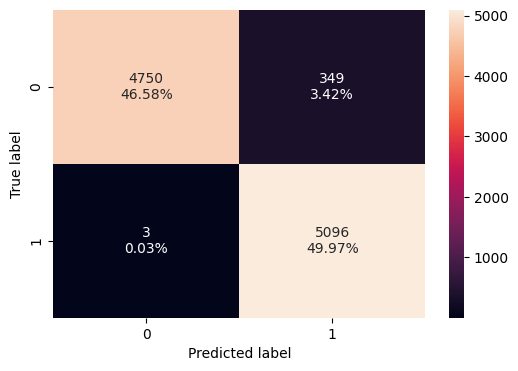

In [ ]:
# print confusion matrix on train set
plot_confusion_matrix(xgb_tuned_model, X_train_over, y_train_over)

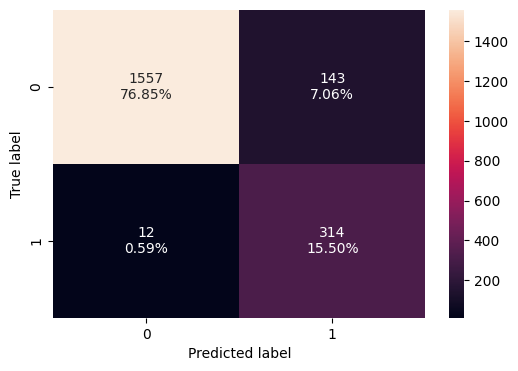

In [ ]:
# print confusion matrix on Validation set
plot_confusion_matrix(xgb_tuned_model, X_val, y_val)

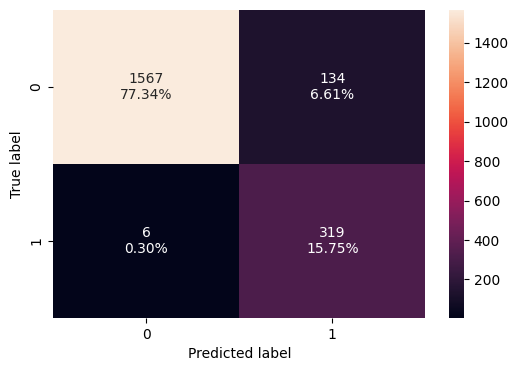

In [ ]:
# print confusion matrix on test set
plot_confusion_matrix(xgb_tuned_model, X_test, y_test)


**Observations**
 - Out of 325 churned customers, the XGBoost model accurately predicted the recalls for all but 6, demonstrating near-perfect performance on the test data.

### Feature importance

- Let's see the feature importance from the tuned xgboost model tuned

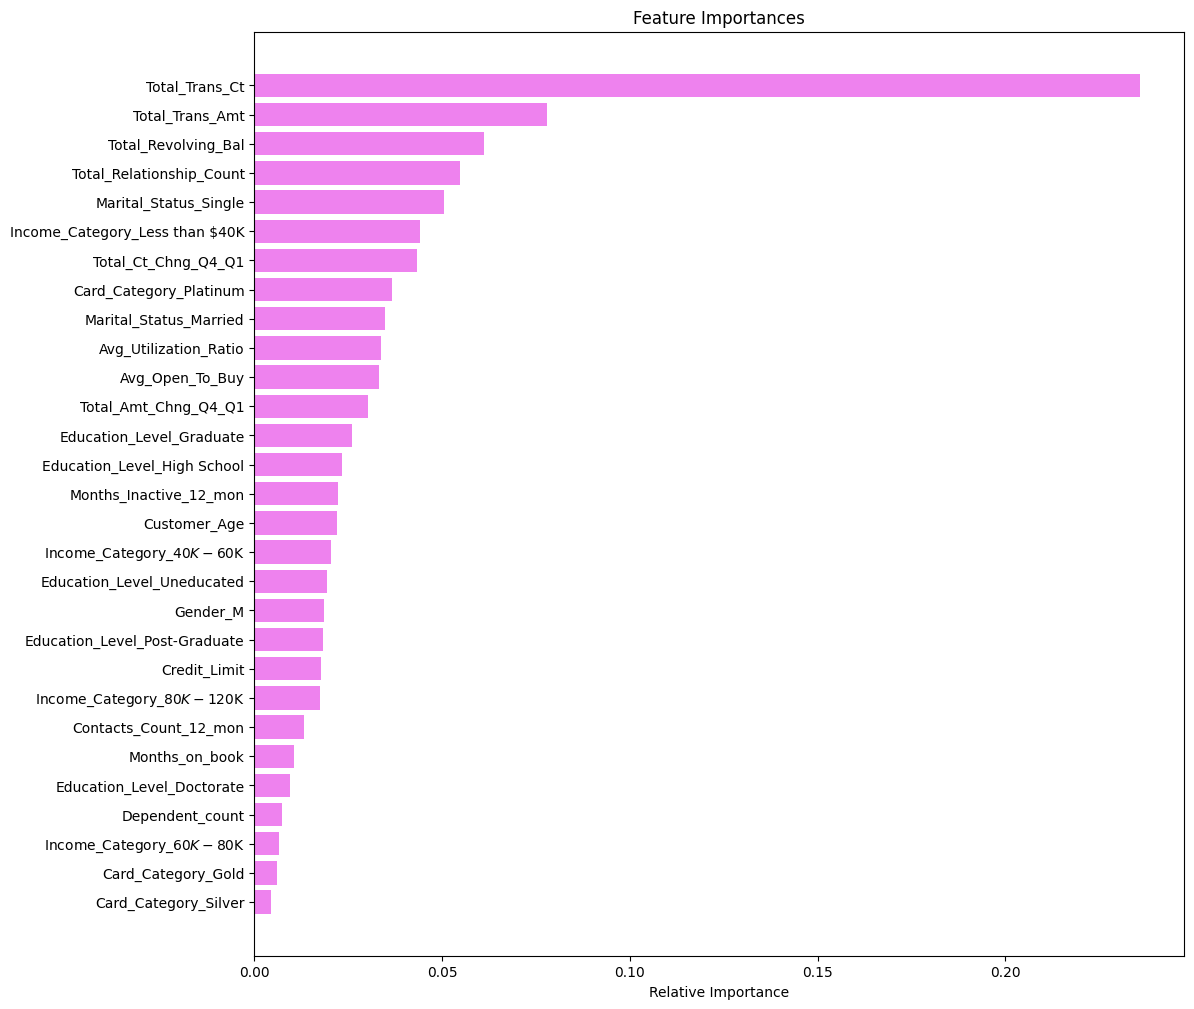

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The top 6 features for the Tuned XGBoost model are
  - Total Transaction Counts
  - Total Transaction Amount
  - Total Revolving Balance
  - Total Relationship Count
  - Marital Status: Not Married
  - Income less than 40K

* Features such as Card Category, Income greater than $60K, and Dependent Count are less significant in predicting whether a customer will churn.

# Business Insights and Conclusions

Based on the analysis and the identified features from the machine learning model, here are some key insights and recommendations for Thera Bank to help reduce customer attrition and improve their credit card services:

**Key Business Insights**
  - **Education and Card Category:**
    - **Higher Education:** Customers with higher education levels are more likely to leave. This could be due to higher expectations for service quality and benefits.
    - **Higher Card Category:** Customers with higher-tier cards are more likely to churn, possibly due to higher fees or unmet expectations of premium services.

  - **Product Usage:**
    - **Number of Products:** Customers with exactly 2 products are more likely to leave, followed by those with 1 product. However, customers using more products are less likely to churn, indicating that deeper engagement with the bank’s offerings enhances loyalty.

  - **Activity Levels:**
    - **Fully Active Customers:** Surprisingly, fully active customers have a higher likelihood of attrition. This might indicate dissatisfaction despite high usage.
   - **Inactive Customers:** Customers inactive for 1 month are less likely to leave, suggesting that occasional inactivity does not necessarily lead to churn.  

  - **Customer Contacts:**
   - **Frequent Contacts:** Customers who contacted the bank 6 times are most likely to leave, followed by those who contacted 5 and 4 times. This could indicate unresolved issues or dissatisfaction.
   - **No Contacts:** Customers who did not contact the bank at all are less likely to leave, followed by those who contacted 1 or 2 times, suggesting that minimal issues or self-sufficiency correlates with retention.

  - **Transaction Patterns:**
    - **Transaction Amount and Count:** Lower transaction amounts and counts are associated with higher attrition. Customers with fewer transactions are more likely to stop using the bank’s services.
    - **Utilization Ratio:** Customers with a low average utilization ratio are more likely to leave. This indicates that customers who do not use much of their available credit are at higher risk of attrition.

- **Demographic Factors:**
   - **Marital Status:** Customers who are not married are more likely to leave. This could be due to different financial priorities or stability.
   - **Income Category:** Customers with an income of less than 40K dollars are more likely to churn. This suggests that lower-income customers might be more sensitive to fees or less satisfied with the credit card offerings.
- **Less Significant Factors:** Card Category, Income greater than $60K, and Dependent Count are less predictive of churn. This indicates that these factors do not significantly influence a customer’s decision to leave.

**Recommendations**
 - **Improve Service Quality for Educated and Premium Customers:**
  - **Enhanced Services:** Offer tailored services and benefits for highly educated and premium card customers to meet their higher expectations.
  - **Feedback Mechanism:** Implement a robust feedback system to understand and address the specific needs and concerns of these customer segments.
  
- **Enhance Transaction Benefits:**
    - **Incentivize Usage:** Introduce rewards or cashback programs that encourage frequent use of the credit card. This can increase transaction counts and amounts, reducing the likelihood of churn.
    - **Personalized Offers:** Provide personalized offers based on spending patterns to make customers feel valued and understood.

- **Increase Product Engagement:**
  - **Cross-Selling:** Encourage customers with 1 or 2 products to explore additional banking products through personalized offers and promotions.
  - **Bundled Services:** Create bundled service packages that provide added value and convenience, making it more attractive for customers to use multiple products.

- **Address Activity-Related Dissatisfaction:**
  - **Customer Satisfaction Surveys:** Regularly survey fully active customers to identify and resolve any dissatisfaction early.
  - **Proactive Support:** Offer proactive support and personalized attention to fully active customers to ensure their needs are being met.

- **Optimize Customer Support:**
 - **Resolve Issues Efficiently:** Focus on resolving issues for customers who frequently contact the bank to prevent dissatisfaction from escalating.
 - **Self-Service Options:** Enhance self-service options and provide c
lear, accessible information to reduce the need for frequent contacts.


By focusing on these areas, Thera Bank can improve customer satisfaction, reduce churn, and ultimately enhance the profitability of their credit card services.